# IF3170 Artificial Intelligence | Tugas Besar 2




Group Number: 12

Group Members:
- Jazila Faza Aliyya N (13221011)
- Ahmad Hafidz (13221055)
- Caitleen Devina (13221065)
- Rayhan Maheswara (18221130)
- Jasmine Callista (18221008)

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cbook import boxplot_stats
import scipy.stats as stats
from scipy.stats import shapiro
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine

## Import Dataset

In [ ]:
# Import dataset dari drive

# train
# link: https://drive.google.com/file/d/15oL1CvPQbrQLVOv66RngwxQ_NnkR6gtt/view?usp=sharing
df_train = pd.read_csv('https://drive.google.com/uc?id=15oL1CvPQbrQLVOv66RngwxQ_NnkR6gtt')
df_train.head()

# test
# link: https://drive.google.com/file/d/1ALsLjSJuM9k8BVJtxFwHKojAG355U5Rw/view?usp=sharing
df_test = pd.read_csv('https://drive.google.com/uc?id=1ALsLjSJuM9k8BVJtxFwHKojAG355U5Rw')

In [ ]:
df_test.shape

(20583, 42)

# Exploratory Data Analysis



In [ ]:
# Untuk kebutuhan EDA, akan dilakukan copy data train ke data baru
df_eda = df_train.copy()

# Cek jumlah baris, jumlah kolom, dan tipe data dari masing-masing kolom yang ada
print(f"Jumlah baris: {df_eda.shape[0]}, Jumlah kolom: {df_eda.shape[1]}")
print(df_eda.dtypes)

Jumlah baris: 175341, Jumlah kolom: 44
swin                 float64
dwin                 float64
stcpb                float64
dtcpb                float64
smean                float64
dmean                float64
trans_depth          float64
response_body_len    float64
id                     int64
proto                 object
attack_cat            object
label                  int64
sjit                 float64
djit                 float64
sinpkt               float64
dinpkt               float64
tcprtt               float64
synack               float64
ackdat               float64
is_sm_ips_ports      float64
ct_state_ttl         float64
ct_flw_http_mthd     float64
is_ftp_login         float64
ct_ftp_cmd           float64
ct_srv_src           float64
ct_srv_dst           float64
ct_dst_ltm           float64
ct_src_ltm           float64
ct_src_dport_ltm     float64
ct_dst_sport_ltm     float64
ct_dst_src_ltm       float64
state                 object
dur                  float64
sbyt

In [ ]:
# Cek jumlah value categorical features
categorical_features_eda = df_eda.select_dtypes(include=['object'])
print(categorical_features_eda.nunique())

proto         133
attack_cat     10
state           9
service        13
dtype: int64


In [ ]:
# Cek jumlah value numerical features
numerical_features_eda = df_eda.select_dtypes(include=['number'])
print(numerical_features_eda.nunique())

swin                     11
dwin                      7
stcpb                 71744
dtcpb                 71536
smean                  1356
dmean                  1322
trans_depth              11
response_body_len      2327
id                   175341
label                     2
sjit                  73895
djit                  73045
sinpkt                72757
dinpkt                70746
tcprtt                41517
synack                38626
ackdat                36365
is_sm_ips_ports           2
ct_state_ttl              5
ct_flw_http_mthd         11
is_ftp_login              4
ct_ftp_cmd                4
ct_srv_src               52
ct_srv_dst               52
ct_dst_ltm               50
ct_src_ltm               50
ct_src_dport_ltm         47
ct_dst_sport_ltm         32
ct_dst_src_ltm           54
dur                   70713
sbytes                 6997
dbytes                 6432
sttl                     11
dttl                      6
sloss                   394
dloss               

In [ ]:
# Statistik untuk semua features
df_eda.describe()

,swin,dwin,stcpb,dtcpb,smean,dmean,trans_depth,response_body_len,id,label,...,sbytes,dbytes,sttl,dttl,sloss,dloss,sload,dload,spkts,dpkts
count,166601.000000,166562.000000,1.666690e+05,1.665380e+05,166553.000000,166486.000000,166556.000000,1.665500e+05,175341.000000,175341.000000,...,1.667800e+05,1.664720e+05,166516.000000,166687.000000,166547.000000,166363.000000,1.665550e+05,1.665040e+05,166687.000000,166655.000000
mean,116.184837,114.956407,9.696210e+08,9.693479e+08,136.803840,124.161041,0.106193,2.157133e+03,87670.000000,0.680622,...,8.734079e+03,1.493589e+04,179.521944,79.584179,4.904790,6.971688,7.342186e+07,6.718596e+05,20.266134,18.923015
std,126.994753,126.880855,1.355284e+09,1.354113e+09,204.753194,258.265755,0.794070,5.509898e+04,50616.731112,0.466237,...,1.712289e+05,1.430150e+05,102.957427,110.494848,64.867849,51.801936,1.884564e+08,2.422879e+06,136.433895,110.898133
min,0.000000,0.000000,0.000000e+00,0.000000e+00,28.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,2.800000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,0.000000,0.000000,0.000000e+00,0.000000e+00,57.000000,0.000000,0.000000,0.000000e+00,43835.000000,0.000000,...,1.140000e+02,0.000000e+00,62.000000,0.000000,0.000000,0.000000,1.303032e+04,0.000000e+00,2.000000,0.000000
50%,0.000000,0.000000,0.000000e+00,0.000000e+00,73.000000,44.000000,0.000000,0.000000e+00,87670.000000,1.000000,...,4.500000e+02,1.640000e+02,254.000000,29.000000,0.000000,0.000000,8.714544e+05,1.426630e+03,2.000000,2.000000
75%,255.000000,255.000000,1.915654e+09,1.912673e+09,100.000000,89.000000,0.000000,0.000000e+00,131505.000000,1.000000,...,1.418000e+03,1.096000e+03,254.000000,252.000000,3.000000,2.000000,8.888889e+07,2.807410e+04,12.000000,10.000000
max,255.000000,255.000000,4.294959e+09,4.294882e+09,1504.000000,1458.000000,172.000000,6.558056e+06,175340.000000,1.000000,...,1.296523e+07,1.465555e+07,255.000000,254.000000,4803.000000,5484.000000,5.988000e+09,2.242273e+07,9616.000000,10974.000000


In [ ]:
# Statistik deskriptif untuk variabel numerik
print(df_eda.describe)

<bound method NDFrame.describe of          swin   dwin         stcpb         dtcpb  smean  dmean  trans_depth  \
0       255.0  255.0  3.680557e+09  5.902739e+08  843.0   51.0          0.0   
1       255.0  255.0  7.613877e+08  2.553413e+09   67.0   44.0          0.0   
2       255.0  255.0  5.630874e+08  3.134542e+09   53.0   45.0          0.0   
3         0.0    NaN  0.000000e+00  0.000000e+00   57.0    0.0          0.0   
4       255.0  255.0  3.754076e+09           NaN    NaN   55.0          0.0   
...       ...    ...           ...           ...    ...    ...          ...   
175336  255.0  255.0  3.553232e+09  1.975260e+09  274.0   88.0          0.0   
175337  255.0  255.0  2.054618e+09  4.206362e+09  129.0   82.0          1.0   
175338  255.0  255.0  2.114678e+09  1.597096e+09   59.0   44.0          0.0   
175339    0.0    0.0  0.000000e+00  0.000000e+00   57.0    0.0          0.0   
175340    0.0    0.0  0.000000e+00  0.000000e+00   57.0    0.0          0.0   

        response_

In [ ]:
# Distribusi frekuensi untuk categorical
for col in df_eda.select_dtypes(include='object').columns:
  print(df_train[col].value_counts())

proto
tcp       75902
udp       60105
unas      11480
arp        2726
ospf       2468
          ...  
leaf-2       89
visa         89
igmp         18
icmp         13
rtp           1
Name: count, Length: 133, dtype: int64
attack_cat
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: count, dtype: int64
state
INT    78148
FIN    73925
CON    12481
REQ     1889
RST       78
ECO       12
URN        1
no         1
PAR        1
Name: count, dtype: int64
service
-           89434
dns         44909
http        17784
smtp         4815
ftp-data     3795
ftp          3263
ssh          1242
pop3         1054
dhcp           93
snmp           75
ssl            51
irc            25
radius         10
Name: count, dtype: int64


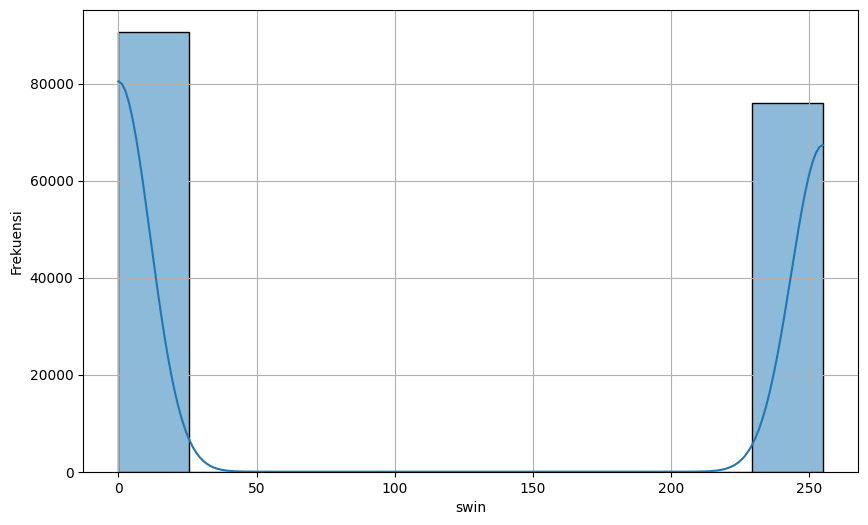

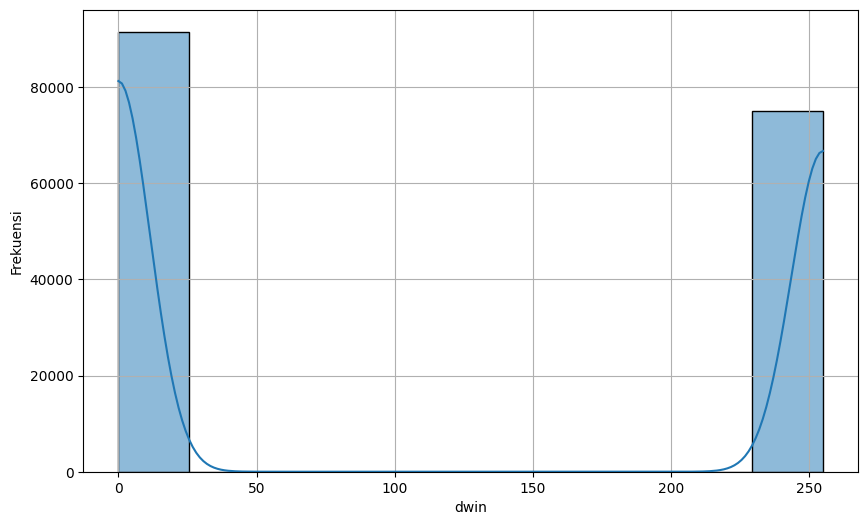

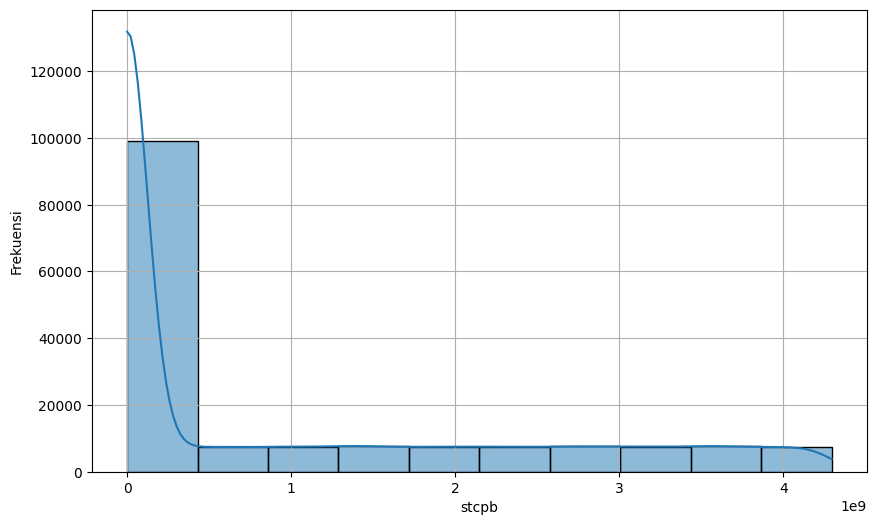

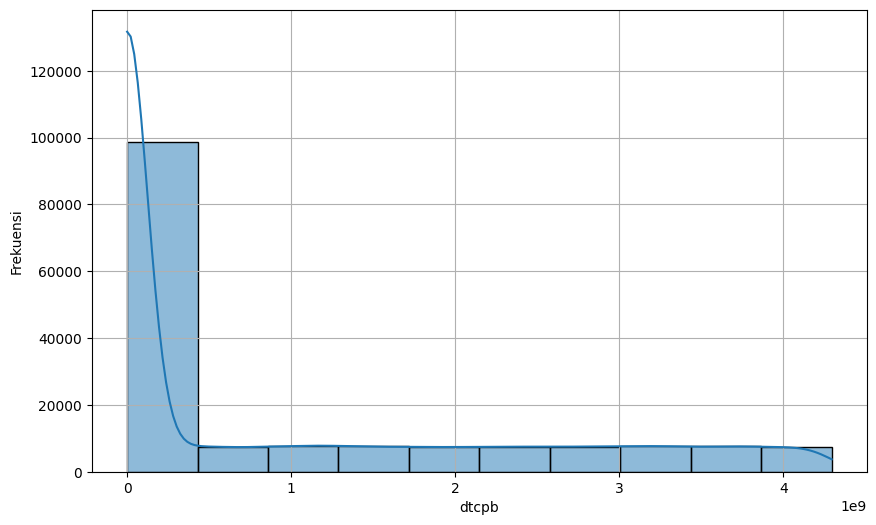

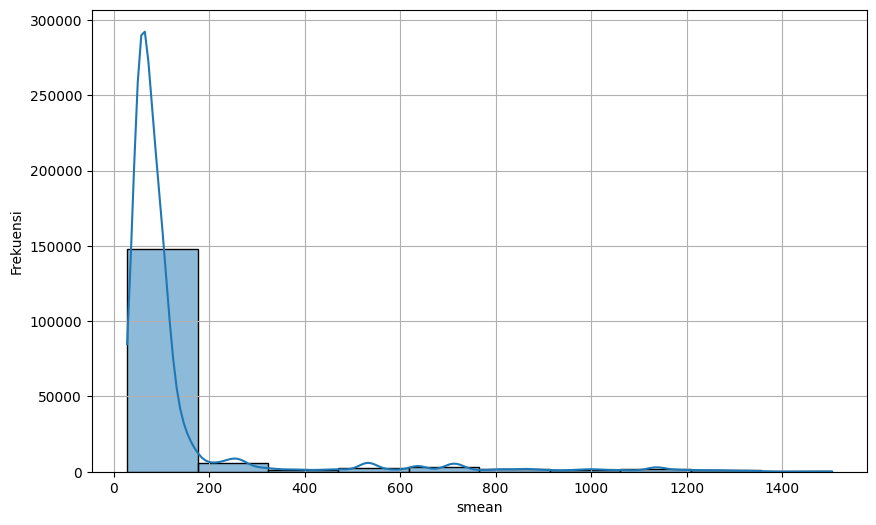

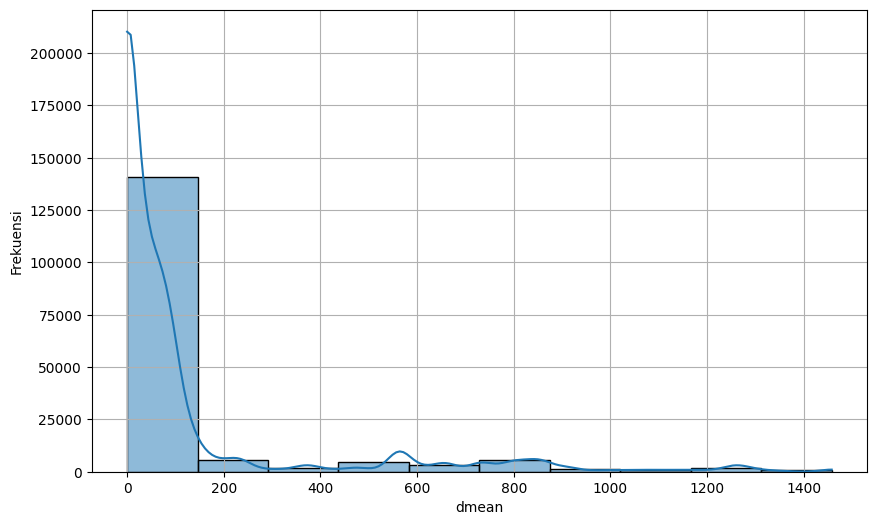

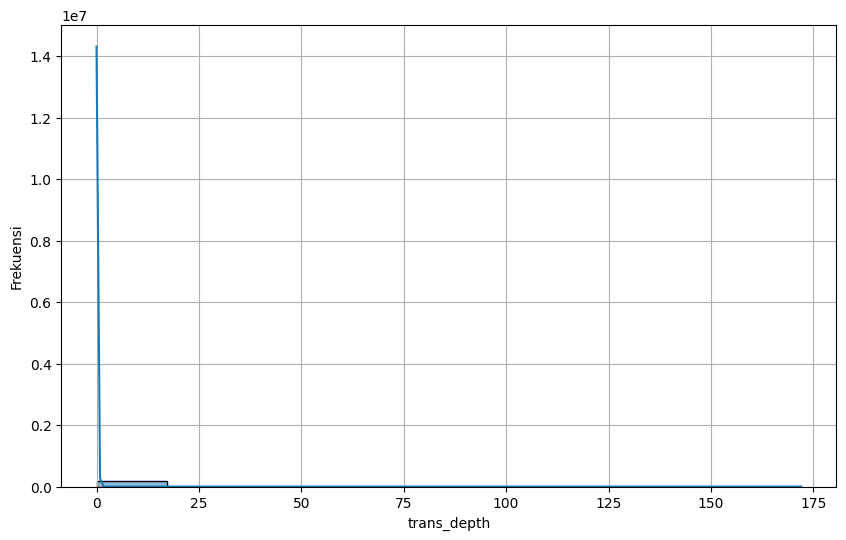

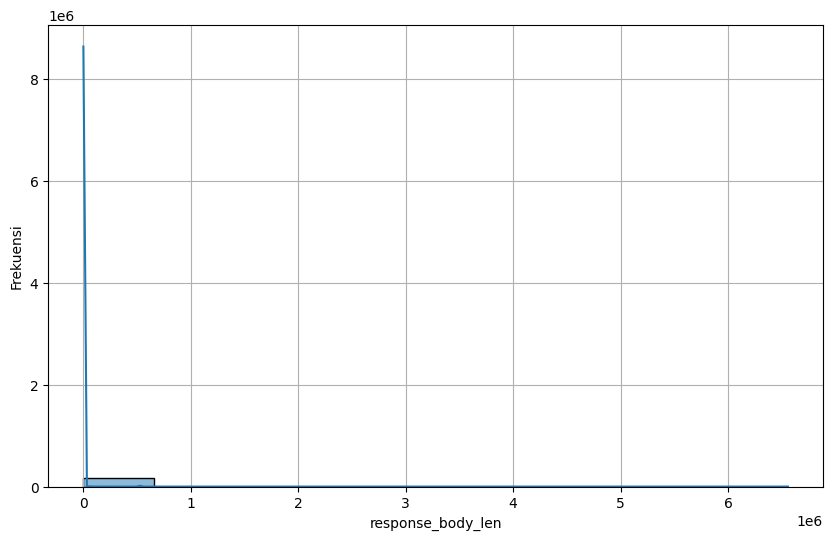

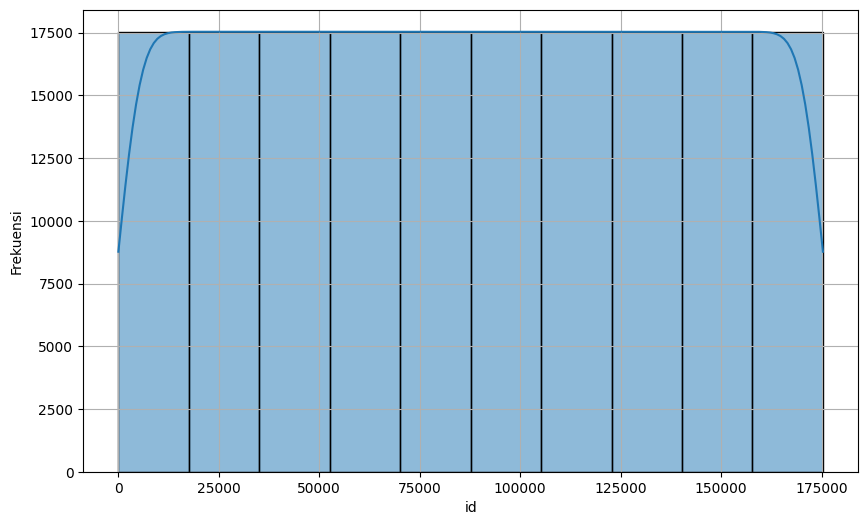

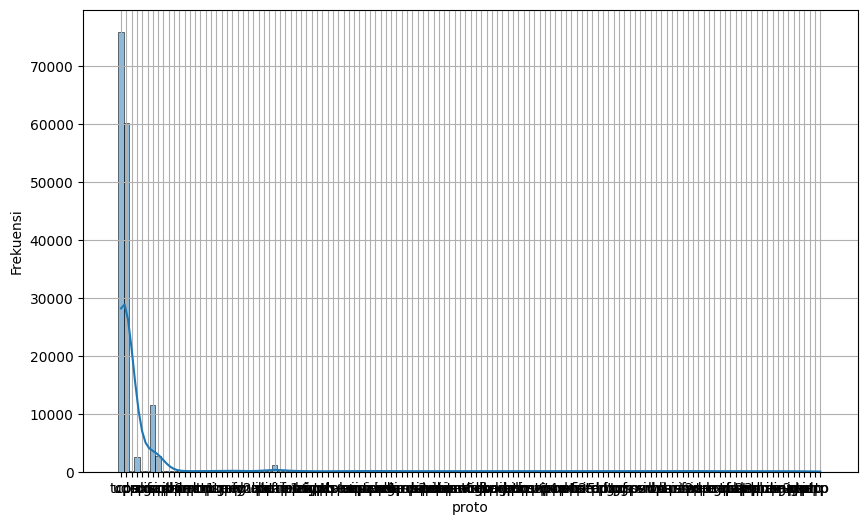

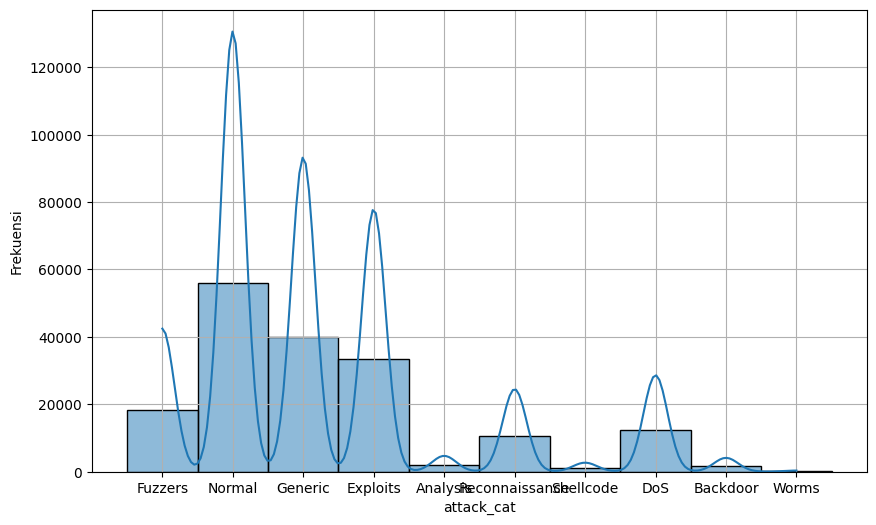

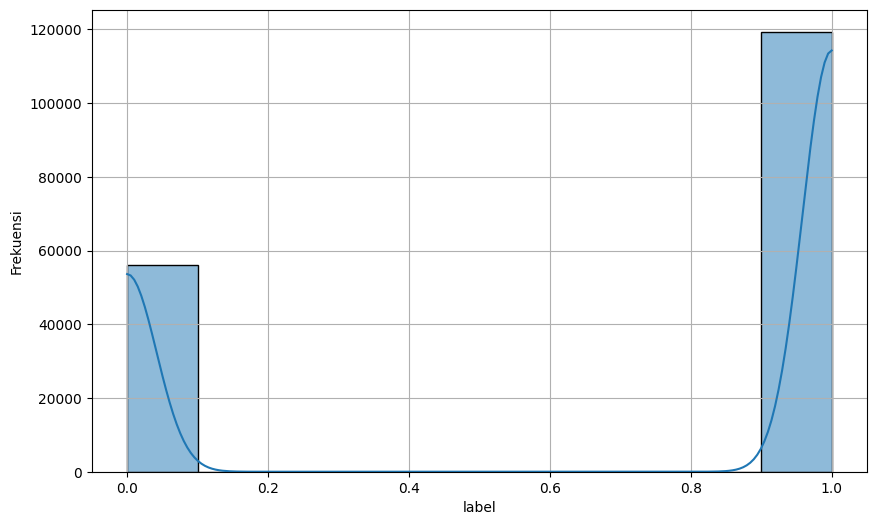

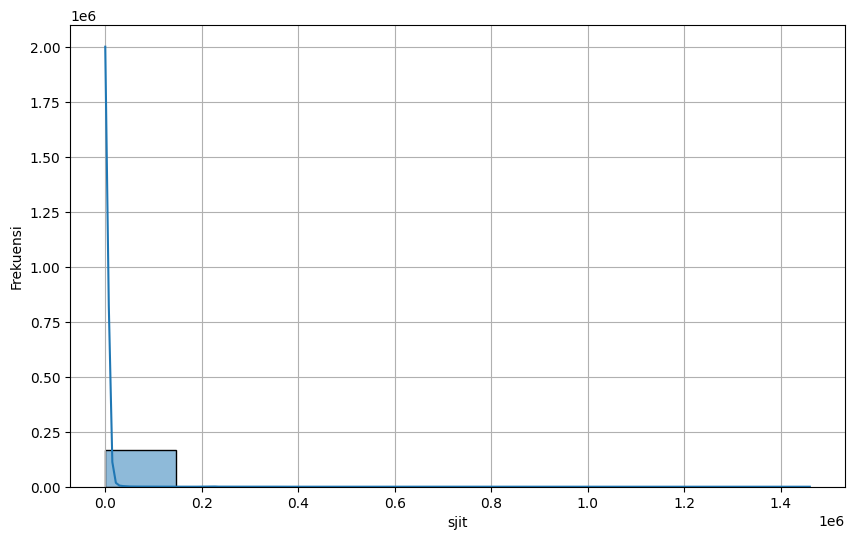

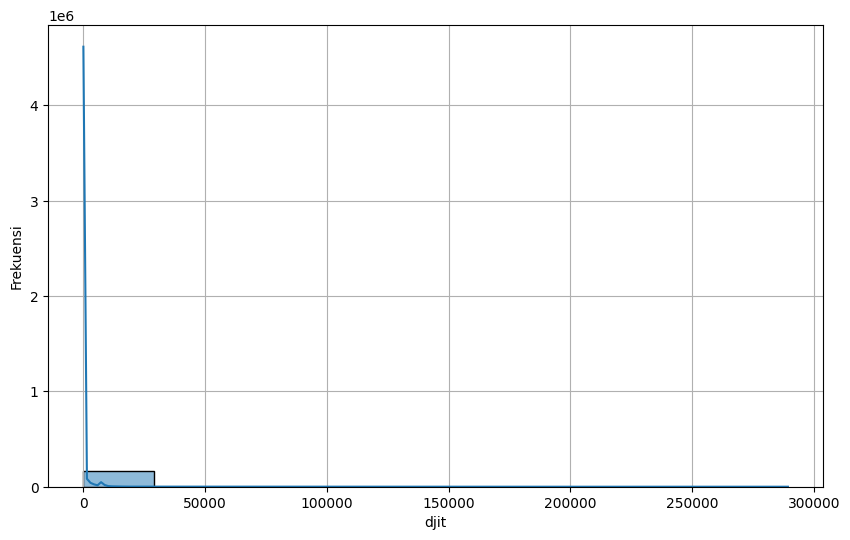

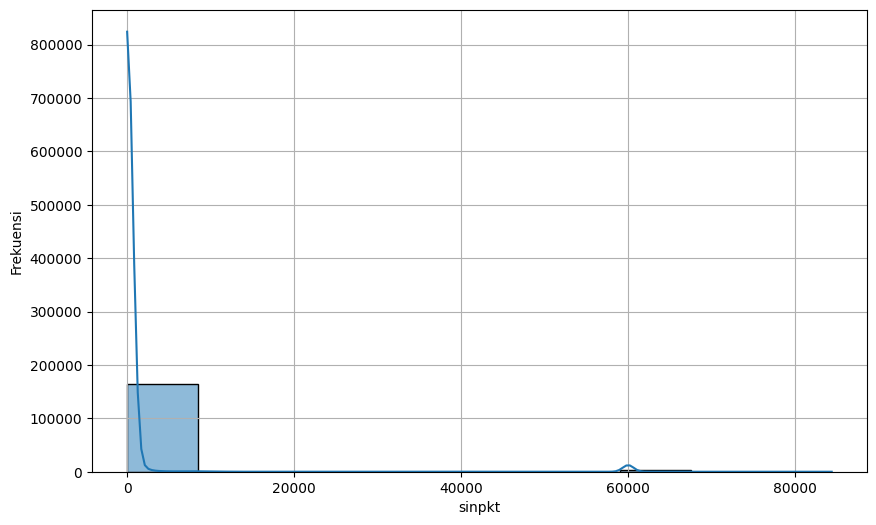

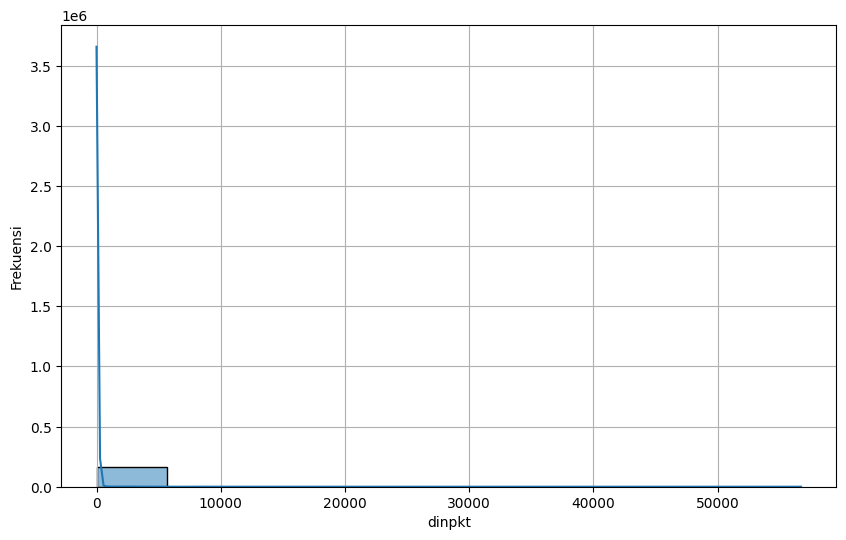

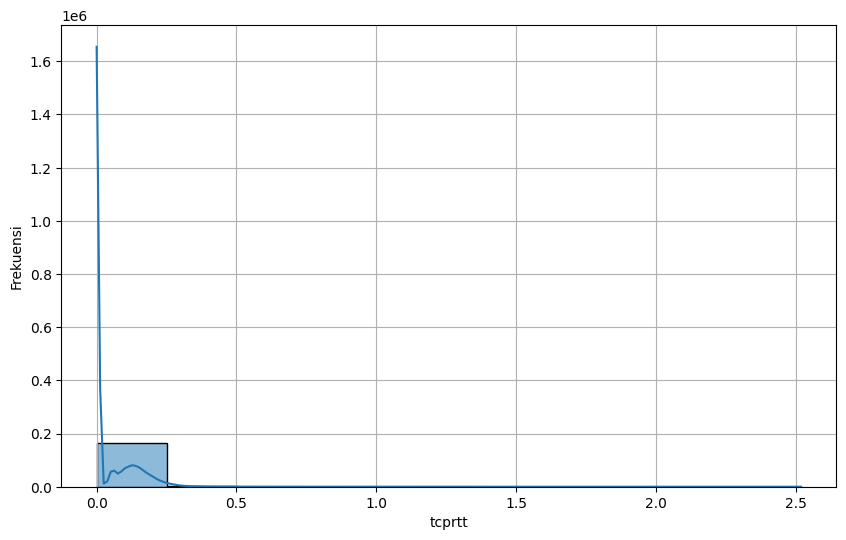

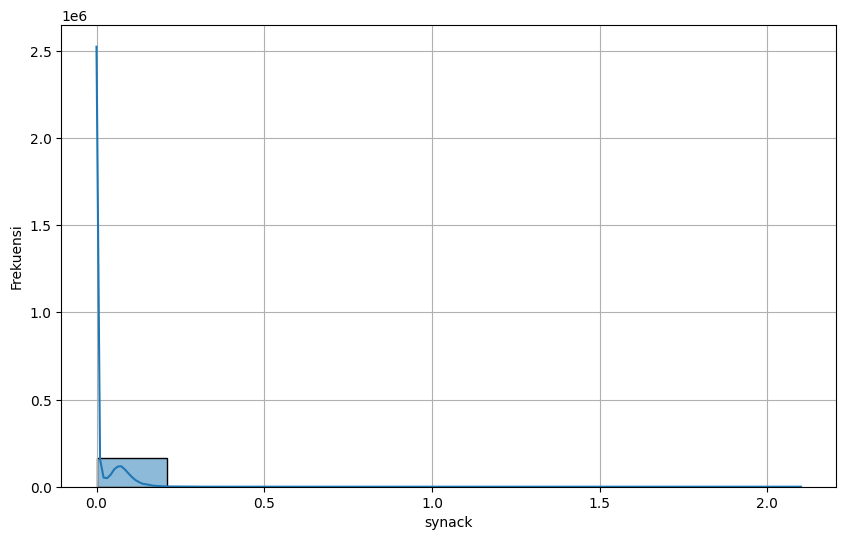

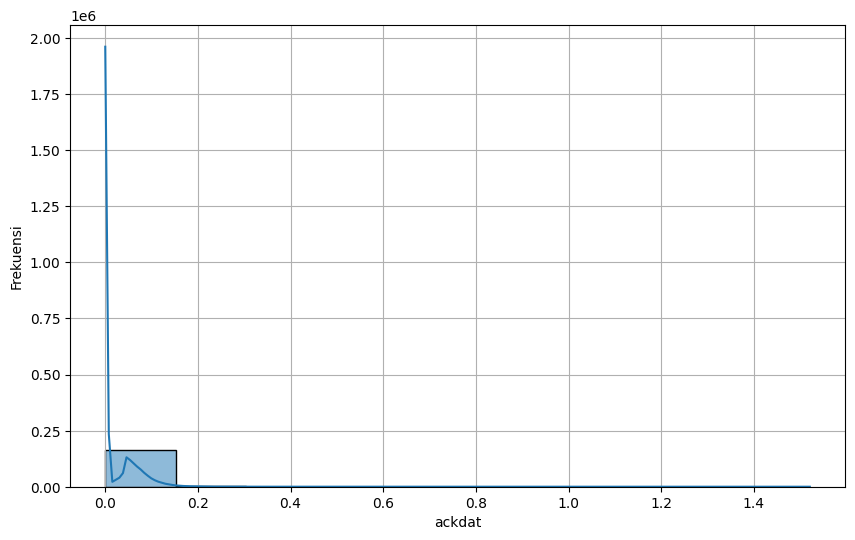

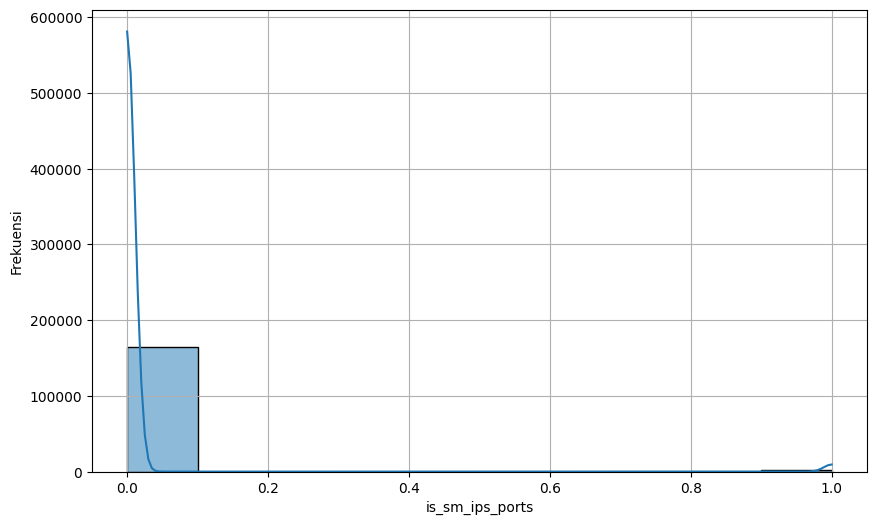

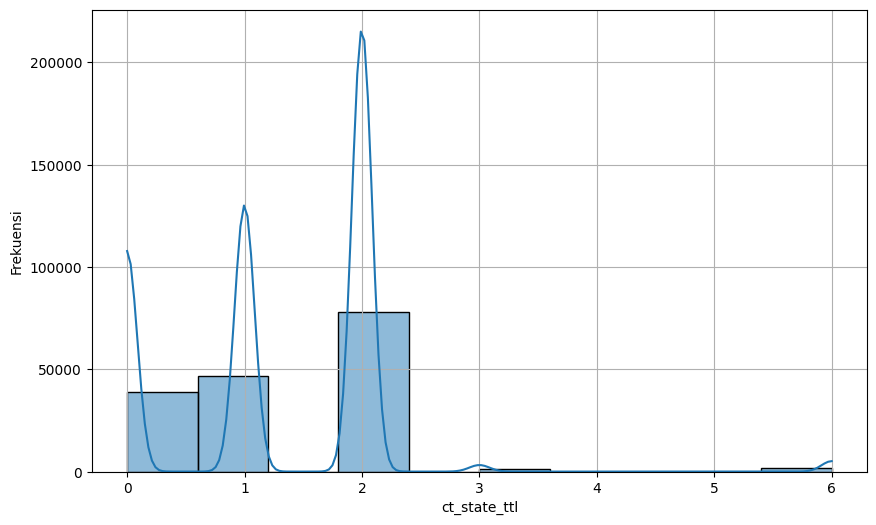

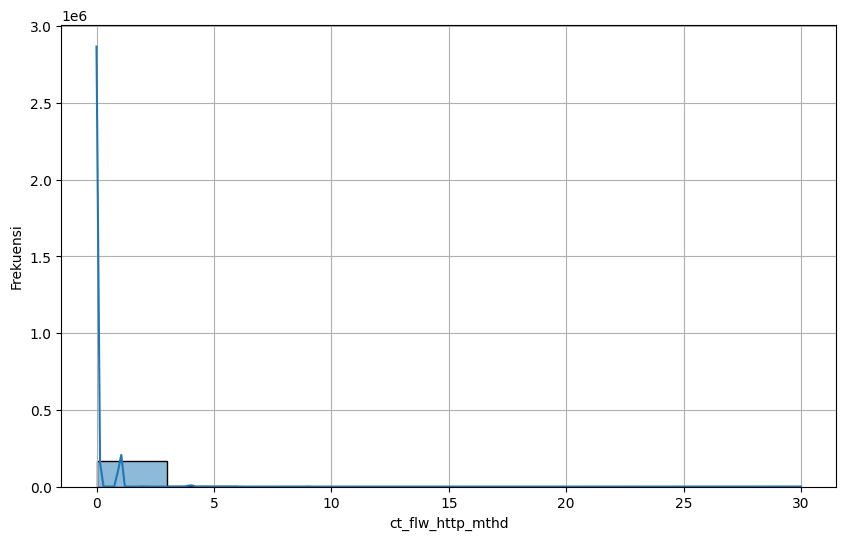

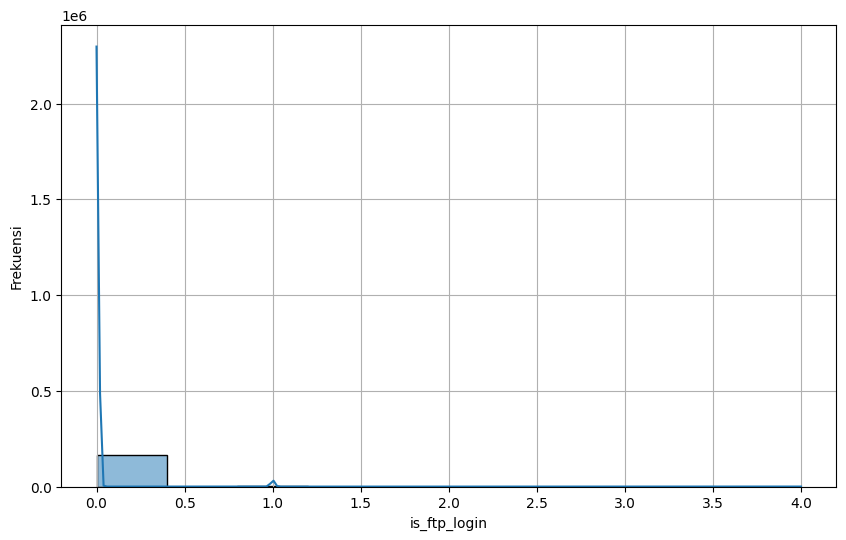

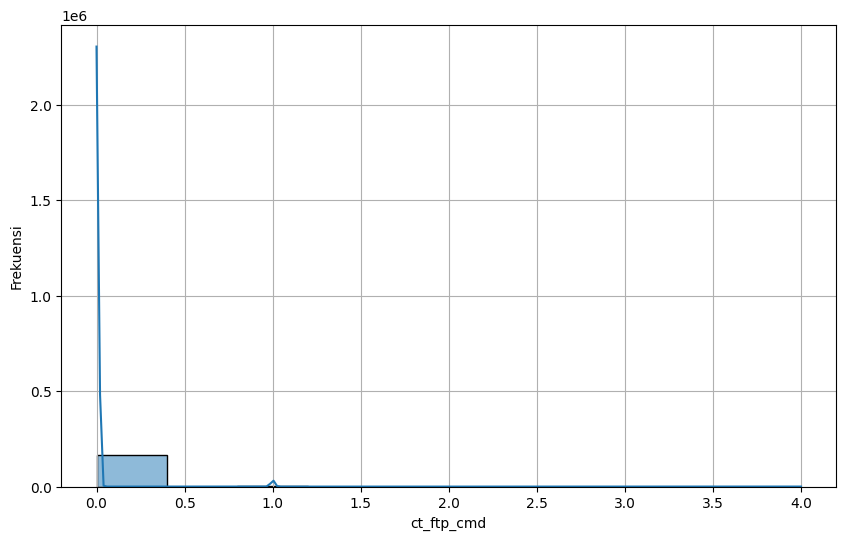

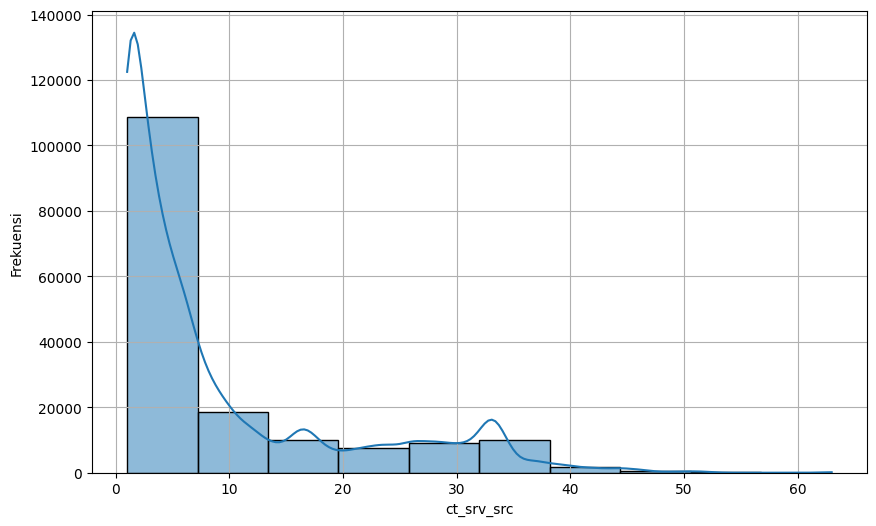

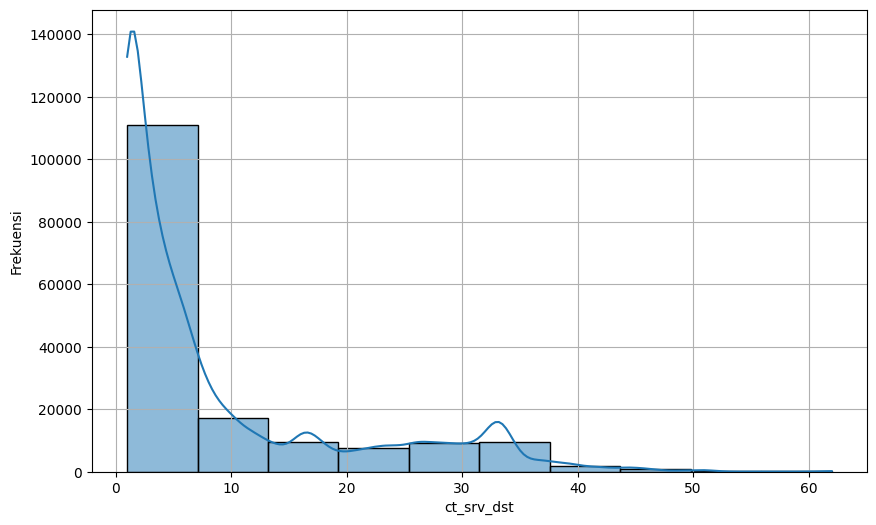

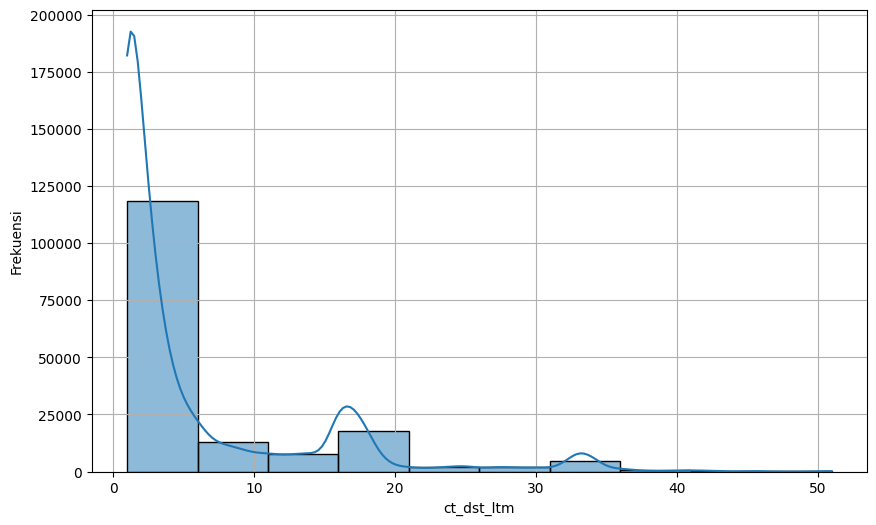

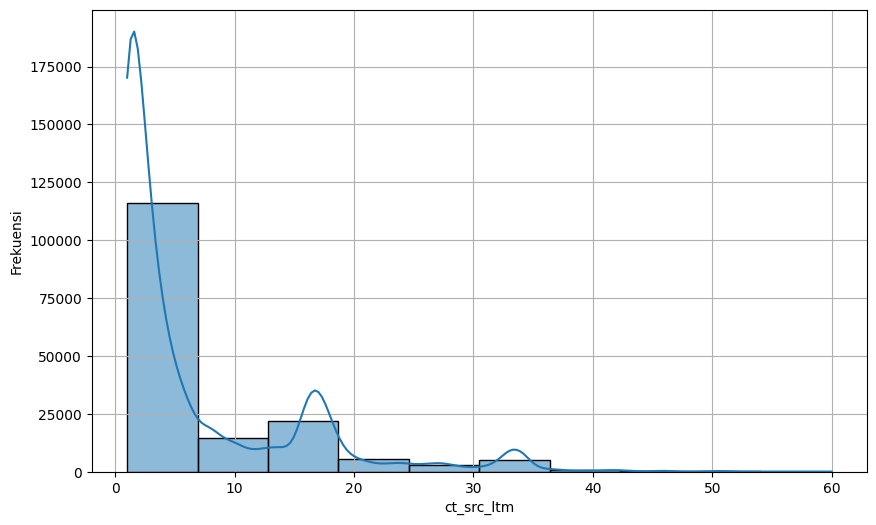

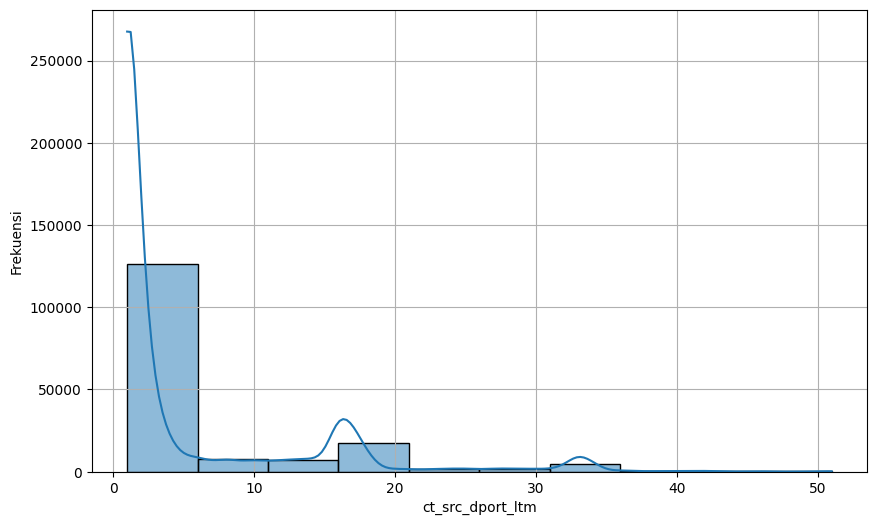

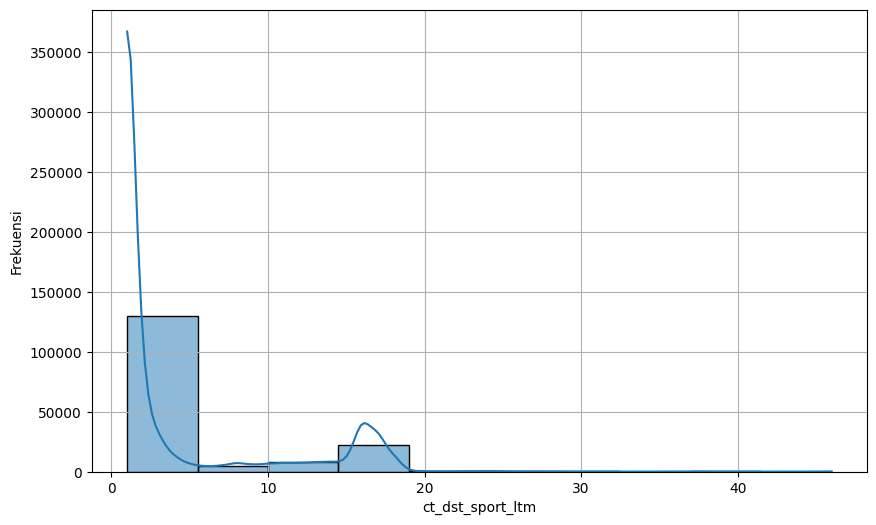

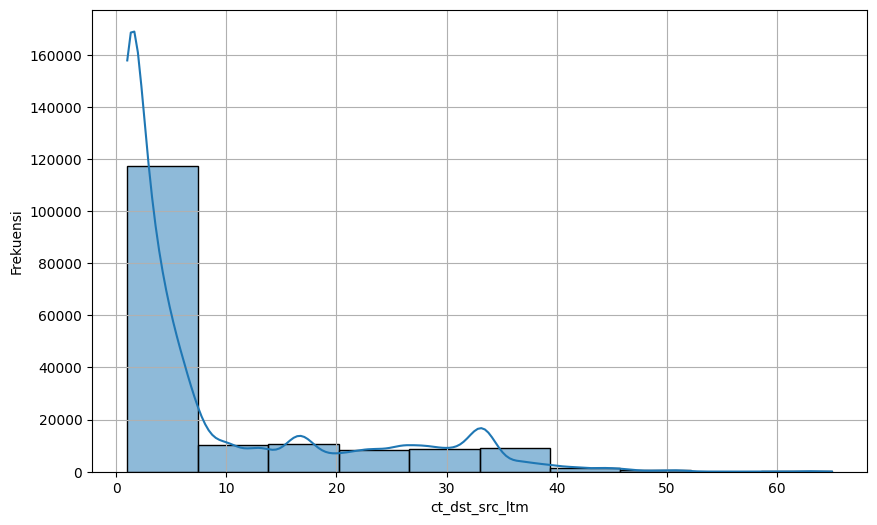

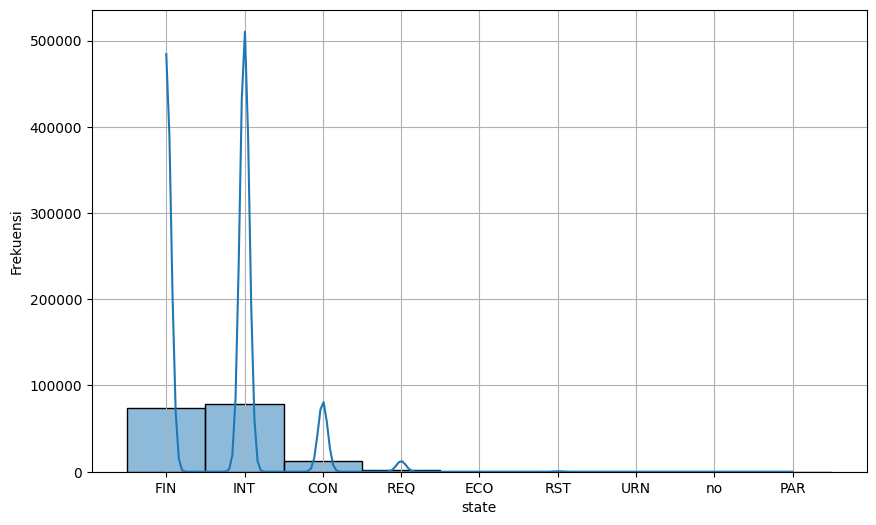

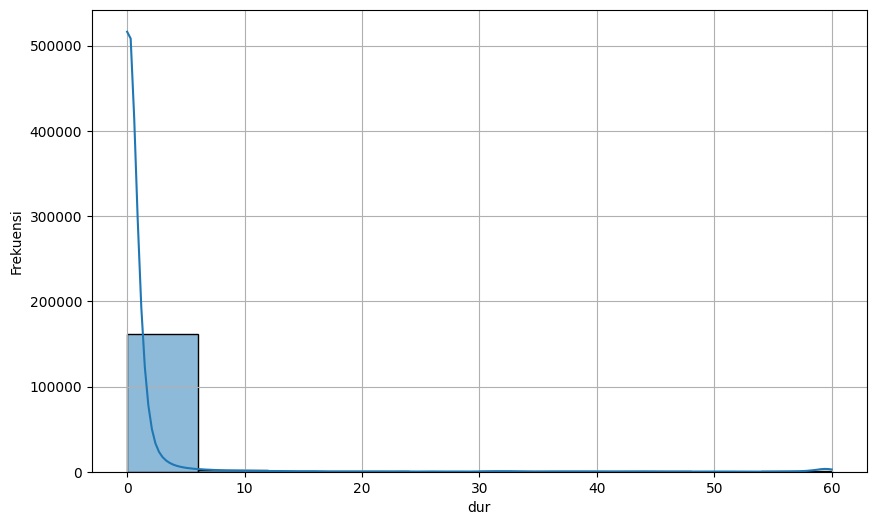

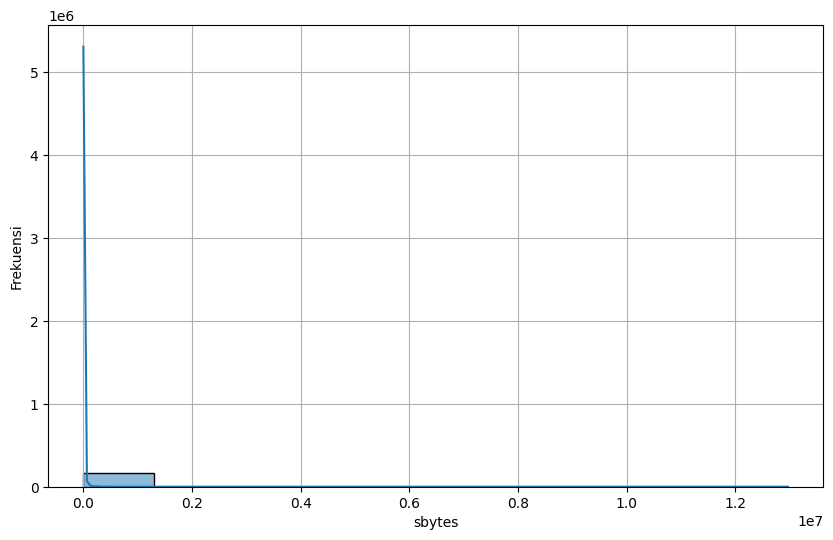

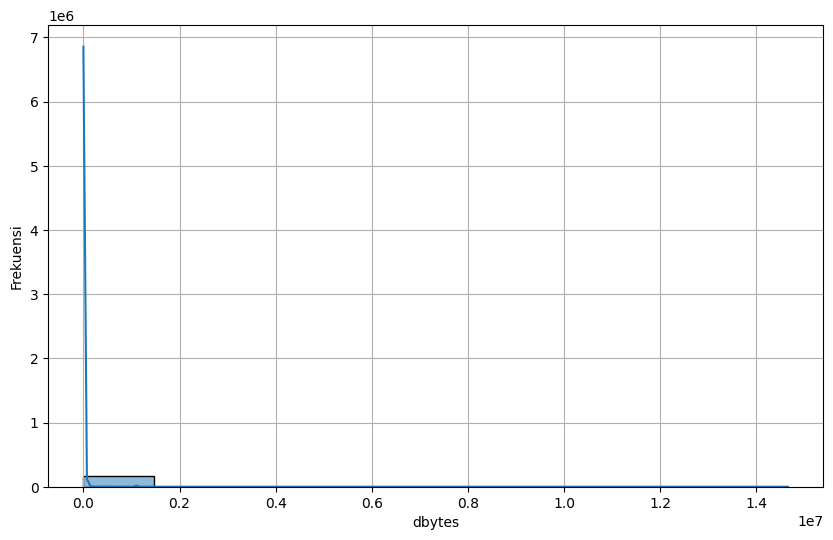

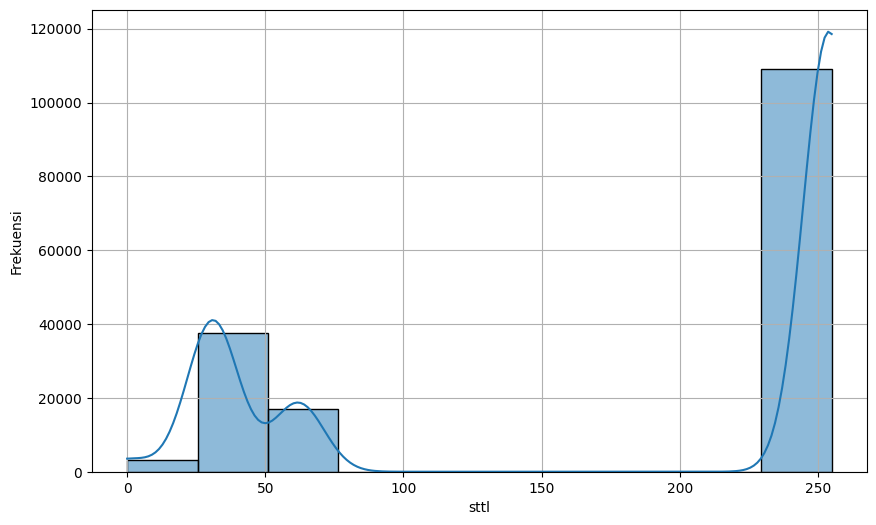

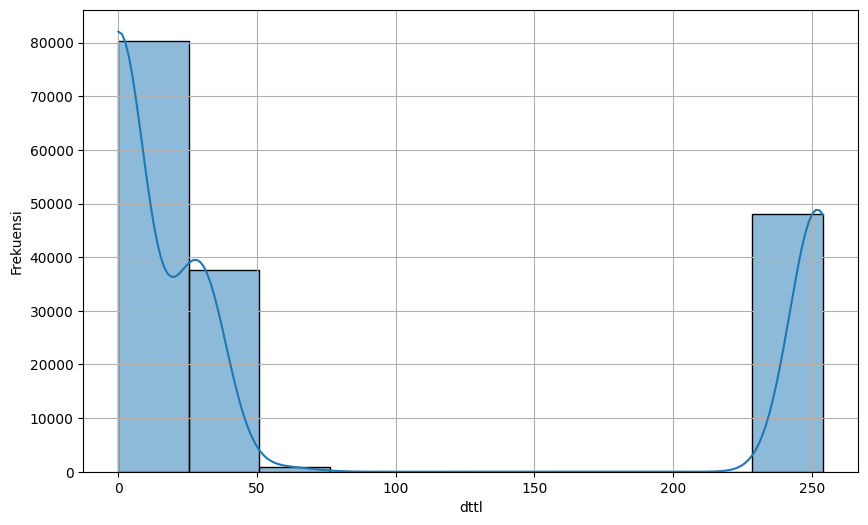

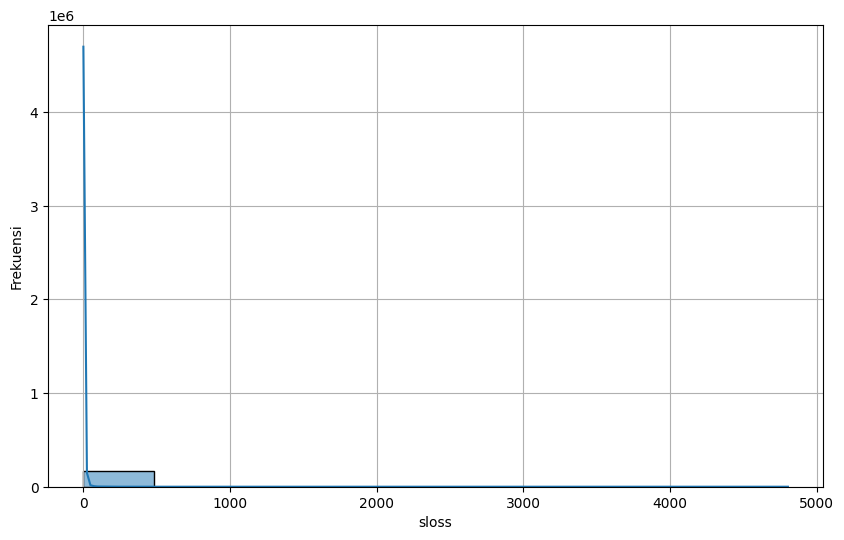

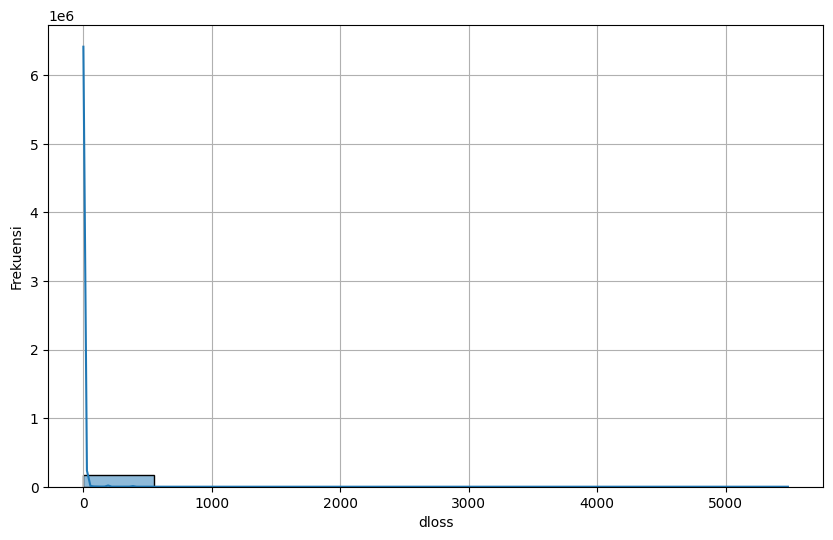

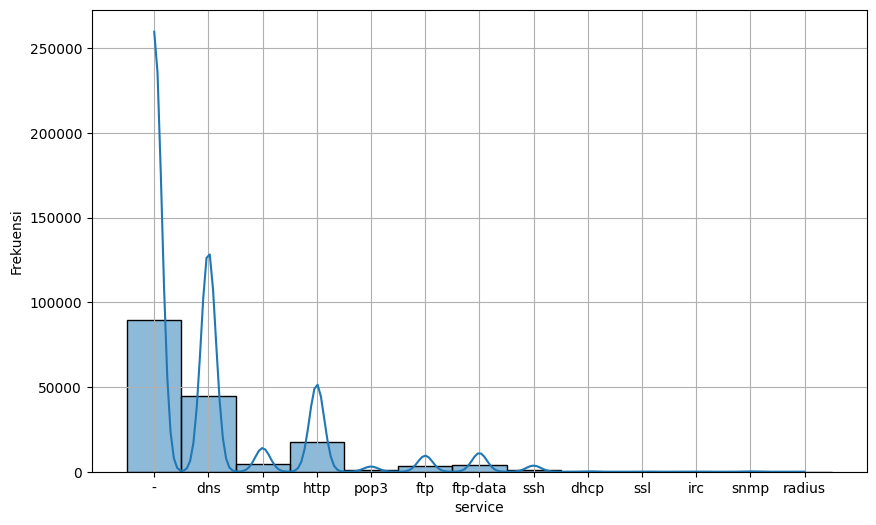

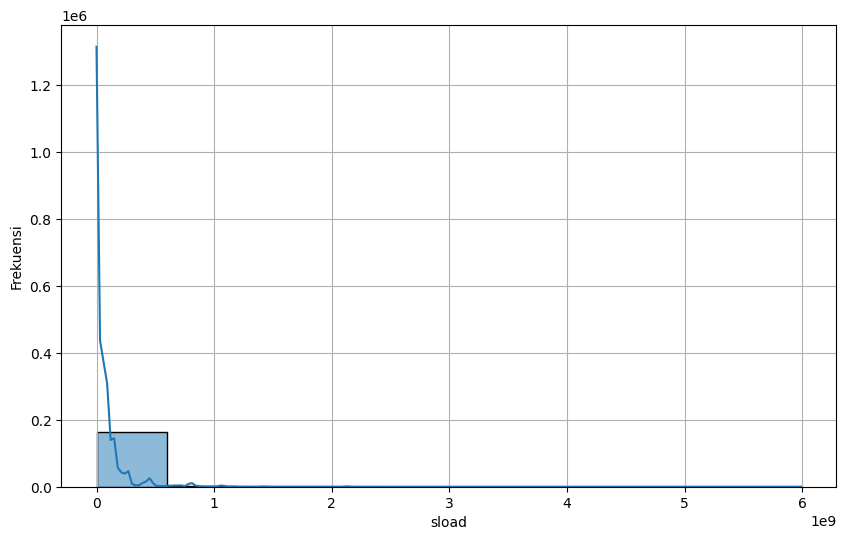

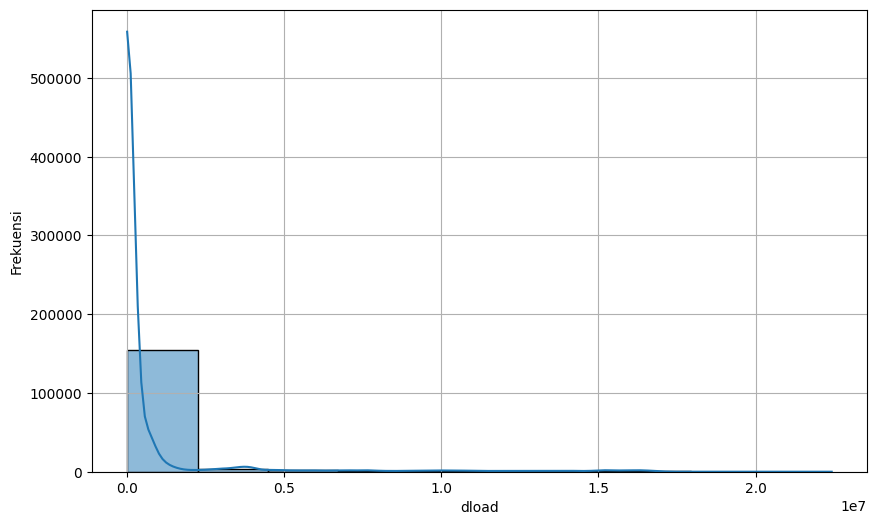

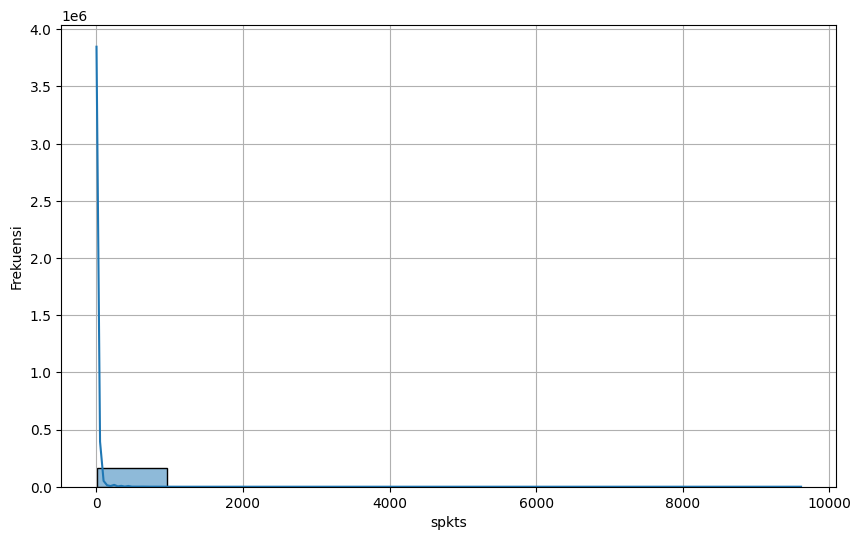

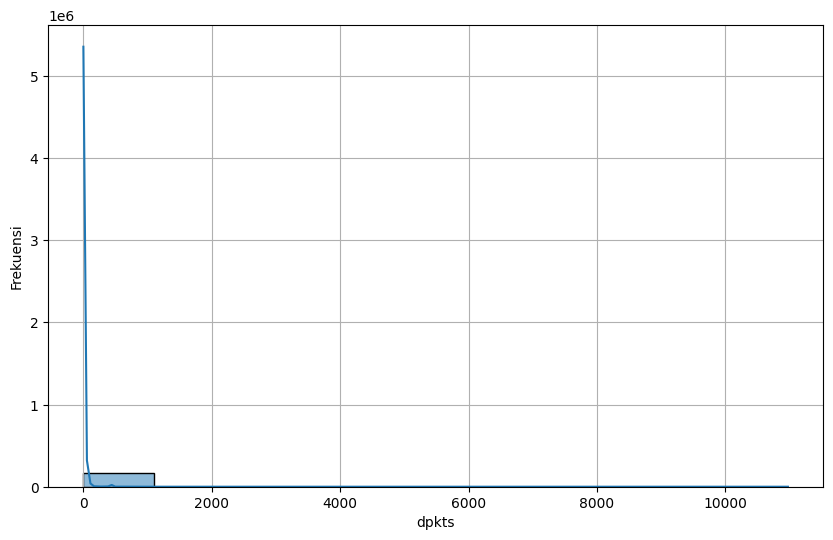

In [ ]:
# Visualisasi Histogram dan KDE (Kernel Density Estimation)
# swin
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['swin'], kde=True, bins=10)
plt.xlabel('swin')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# dwin
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['dwin'], kde=True, bins=10)
plt.xlabel('dwin')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# stcpb
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['stcpb'], kde=True, bins=10)
plt.xlabel('stcpb')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# dtcpb
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['dtcpb'], kde=True, bins=10)
plt.xlabel('dtcpb')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# smean
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['smean'], kde=True, bins=10)
plt.xlabel('smean')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# dmean
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['dmean'], kde=True, bins=10)
plt.xlabel('dmean')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# trans_depth
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['trans_depth'], kde=True, bins=10)
plt.xlabel('trans_depth')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# response_body_len
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['response_body_len'], kde=True, bins=10)
plt.xlabel('response_body_len')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# id
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['id'], kde=True, bins=10)
plt.xlabel('id')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# proto
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['proto'], kde=True, bins=10)
plt.xlabel('proto')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# attack_cat
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['attack_cat'], kde=True, bins=10)
plt.xlabel('attack_cat')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# label
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['label'], kde=True, bins=10)
plt.xlabel('label')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# sjit
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['sjit'], kde=True, bins=10)
plt.xlabel('sjit')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# djit
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['djit'], kde=True, bins=10)
plt.xlabel('djit')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# sinpkt
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['sinpkt'], kde=True, bins=10)
plt.xlabel('sinpkt')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# dinpkt
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['dinpkt'], kde=True, bins=10)
plt.xlabel('dinpkt')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# tcprtt
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['tcprtt'], kde=True, bins=10)
plt.xlabel('tcprtt')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# synack
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['synack'], kde=True, bins=10)
plt.xlabel('synack')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# ackdat
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['ackdat'], kde=True, bins=10)
plt.xlabel('ackdat')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# is_sm_ips_ports
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['is_sm_ips_ports'], kde=True, bins=10)
plt.xlabel('is_sm_ips_ports')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# ct_state_ttl
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['ct_state_ttl'], kde=True, bins=10)
plt.xlabel('ct_state_ttl')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# ct_flw_http_mthd
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['ct_flw_http_mthd'], kde=True, bins=10)
plt.xlabel('ct_flw_http_mthd')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# is_ftp_login
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['is_ftp_login'], kde=True, bins=10)
plt.xlabel('is_ftp_login')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# ct_ftp_cmd
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['ct_ftp_cmd'], kde=True, bins=10)
plt.xlabel('ct_ftp_cmd')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# ct_srv_src
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['ct_srv_src'], kde=True, bins=10)
plt.xlabel('ct_srv_src')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# ct_srv_dst
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['ct_srv_dst'], kde=True, bins=10)
plt.xlabel('ct_srv_dst')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# ct_dst_ltm
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['ct_dst_ltm'], kde=True, bins=10)
plt.xlabel('ct_dst_ltm')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# ct_src_ltm
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['ct_src_ltm'], kde=True, bins=10)
plt.xlabel('ct_src_ltm')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# ct_src_dport_ltm
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['ct_src_dport_ltm'], kde=True, bins=10)
plt.xlabel('ct_src_dport_ltm')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# ct_dst_sport_ltm
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['ct_dst_sport_ltm'], kde=True, bins=10)
plt.xlabel('ct_dst_sport_ltm')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# ct_dst_src_ltm
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['ct_dst_src_ltm'], kde=True, bins=10)
plt.xlabel('ct_dst_src_ltm')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# state
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['state'], kde=True, bins=10)
plt.xlabel('state')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# dur
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['dur'], kde=True, bins=10)
plt.xlabel('dur')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# sbytes
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['sbytes'], kde=True, bins=10)
plt.xlabel('sbytes')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# dbytes
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['dbytes'], kde=True, bins=10)
plt.xlabel('dbytes')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# sttl
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['sttl'], kde=True, bins=10)
plt.xlabel('sttl')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# dttl
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['dttl'], kde=True, bins=10)
plt.xlabel('dttl')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# sloss
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['sloss'], kde=True, bins=10)
plt.xlabel('sloss')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# dloss
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['dloss'], kde=True, bins=10)
plt.xlabel('dloss')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# service
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['service'], kde=True, bins=10)
plt.xlabel('service')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# sload
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['sload'], kde=True, bins=10)
plt.xlabel('sload')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# dload
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['dload'], kde=True, bins=10)
plt.xlabel('dload')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# spkts
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['spkts'], kde=True, bins=10)
plt.xlabel('spkts')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# dpkts
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['dpkts'], kde=True, bins=10)
plt.xlabel('dpkts')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

<Axes: >

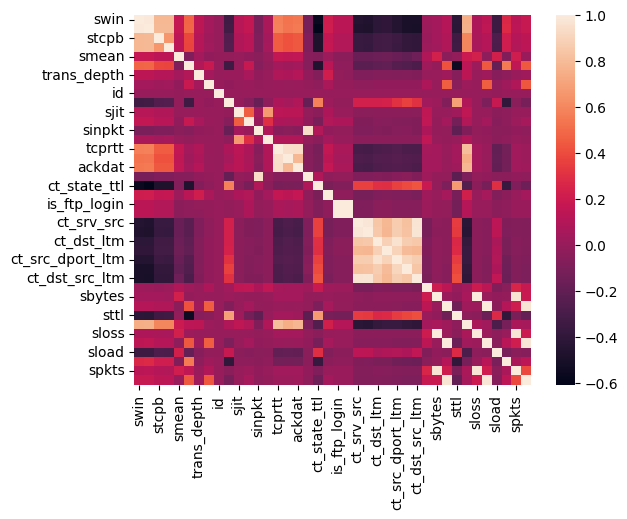

In [ ]:
# Cek korelasi antar numerical features
sns.heatmap(df_eda.corr(numeric_only=True))

Terlihat di sini bahwa yang memiliki hubungan yang kuat adalah antara:
1. swin, stcpb, smean
2. tcprtt, ackdat
3. ct_srv_src, ct_dst_ltm, ct_src_dport_ltm, ct_dst_src_ltm

Referensi
https://www.analyticsvidhya.com/blog/2023/11/train-test-validation-split/#:~:text=the%20overall%20dataset.-,How%20to%20Split%20Train%2DTest%20%3F,distribution%20of%20classes%20or%20outcomes.

# 1. Data Cleaning and Preprocessing



## A. Data Cleaning

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

### I. Handling Missing Data



In [ ]:
# Untuk kebutuhan Data Cleaning, akan dilakukan copy data dari eda ke data baru
df_cleaning = df_eda.copy()

# Identifikasi missing values dengan mengecek jumlah NULL value di setiap kolom
missing_values = df_cleaning.isnull().sum()
print(missing_values)

swin                 8740
dwin                 8779
stcpb                8672
dtcpb                8803
smean                8788
dmean                8855
trans_depth          8785
response_body_len    8791
id                      0
proto                8826
attack_cat              0
label                   0
sjit                 8738
djit                 8846
sinpkt               8707
dinpkt               8734
tcprtt               8836
synack               8736
ackdat               8595
is_sm_ips_ports      8746
ct_state_ttl         8635
ct_flw_http_mthd     8647
is_ftp_login         8647
ct_ftp_cmd           8842
ct_srv_src           8851
ct_srv_dst           8774
ct_dst_ltm           8738
ct_src_ltm           8823
ct_src_dport_ltm     8775
ct_dst_sport_ltm     8788
ct_dst_src_ltm       8895
state                8805
dur                  8722
sbytes               8561
dbytes               8869
sttl                 8825
dttl                 8654
sloss                8794
dloss       

Karena jumlah missing null values yang memiliki range 6000-an s.d 7000-an, maka akan dilakukan data imputation (kecuali id, attack_cat, dan label). Akan dibagi antara categorical feature dan numerical feature di mana:
1. Categorical: akan digunakan pengisian missing value dengan mode/modus/most frequent
2. Numerical: akan digunakan pengisian missing value dengan median

In [ ]:
# Pengecekan value_counts untuk semua kolom
for columns in df_cleaning.columns:
  print(df_cleaning[columns].value_counts())

swin
0.0      90688
255.0    75904
167.0        1
168.0        1
14.0         1
192.0        1
45.0         1
42.0         1
172.0        1
103.0        1
87.0         1
Name: count, dtype: int64
dwin
0.0      91471
255.0    75086
48.0         1
37.0         1
70.0         1
40.0         1
244.0        1
Name: count, dtype: int64
stcpb
0.000000e+00    91457
4.125224e+09        8
1.264271e+09        6
2.037155e+09        6
2.897673e+09        6
                ...  
7.808834e+07        1
3.806513e+09        1
1.889328e+09        1
1.271642e+09        1
2.114678e+09        1
Name: count, Length: 71744, dtype: int64
dtcpb
0.000000e+00    91350
2.296510e+09       14
5.314092e+08       12
3.330703e+09       11
1.200223e+09       11
                ...  
2.108690e+09        1
3.817768e+09        1
2.308836e+08        1
2.856270e+09        1
1.597096e+09        1
Name: count, Length: 71536, dtype: int64
smean
57.0      38587
100.0     22729
53.0       5234
56.0       4962
73.0       4881
    

In [ ]:
# Pilih categorical features
categorical_features = df_cleaning.select_dtypes(include=['object']).columns.tolist()
print(categorical_features)

['proto', 'attack_cat', 'state', 'service']


In [ ]:
# Pilih numerrical features
numerical_features = df_cleaning.select_dtypes(include=['number']).columns.tolist()
print(numerical_features)

['swin', 'dwin', 'stcpb', 'dtcpb', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'id', 'label', 'sjit', 'djit', 'sinpkt', 'dinpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'sload', 'dload', 'spkts', 'dpkts']


In [ ]:
# Pengisian missing value untuk categorical dan numerical
# Categorical
categorical_features_imputer = SimpleImputer(strategy='most_frequent')
df_cleaning[categorical_features] = categorical_features_imputer.fit_transform(df_cleaning[categorical_features])

In [ ]:
# Numerical
numerical_features_imputer = SimpleImputer(strategy='median')
df_cleaning[numerical_features] = numerical_features_imputer.fit_transform(df_cleaning[numerical_features])

In [ ]:
# Cek apakah masih ada missing_values
check_missing_values = df_cleaning.isnull().sum()
print(check_missing_values)

swin                 0
dwin                 0
stcpb                0
dtcpb                0
smean                0
dmean                0
trans_depth          0
response_body_len    0
id                   0
proto                0
attack_cat           0
label                0
sjit                 0
djit                 0
sinpkt               0
dinpkt               0
tcprtt               0
synack               0
ackdat               0
is_sm_ips_ports      0
ct_state_ttl         0
ct_flw_http_mthd     0
is_ftp_login         0
ct_ftp_cmd           0
ct_srv_src           0
ct_srv_dst           0
ct_dst_ltm           0
ct_src_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
state                0
dur                  0
sbytes               0
dbytes               0
sttl                 0
dttl                 0
sloss                0
dloss                0
service              0
sload                0
dload                0
spkts                0
dpkts      

Akan dilanjukan dengan pengecekan korelasi antar yang numerical

<Axes: >

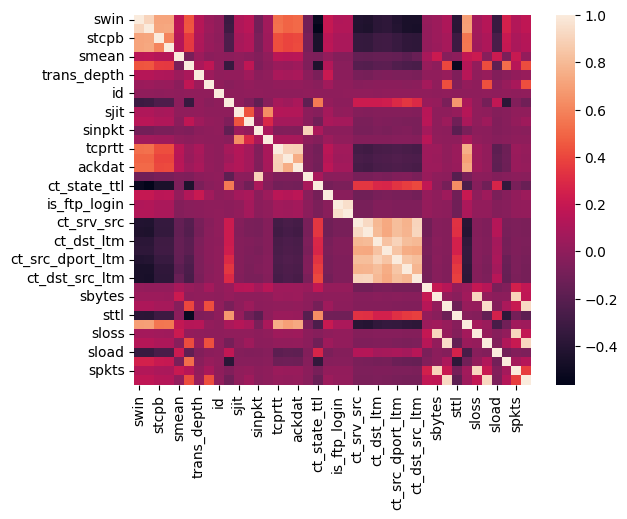

In [ ]:
# Check korelasi numerical feature setelah isi missing values
sns.heatmap(df_cleaning.corr(numeric_only=True))

### II. Dealing with Outliers



Menggunakan referensi

https://medium.com/analytics-vidhya/identifying-cleaning-and-replacing-outliers-titanic-dataset-20182a062893

https://www.pluralsight.com/resources/blog/guides/cleaning-up-data-from-outliers

https://www.kdnuggets.com/2018/08/make-machine-learning-models-robust-outliers.html

https://www.kaggle.com/code/aimack/how-to-handle-outliers

Akan dilakukan uji normalitas terlebih dahulu sebelum menentukan metode untuk dealing with outliers menggunakan Shapiro-Wilk Test di mana:
Nilai p-value di bawah 0.05 menandakan bahwa distribusi tidak normal

In [ ]:
# Uji Normalitas terlebih dahulu, dan cek apakah data terdistribusi normal/tidak
# Gunakan salah satu cara untuk menguji normalitas
# Shapiro-wilk test
numerical_features_outliers = df_cleaning.select_dtypes(include=[np.number])

for columns in numerical_features_outliers.columns:
  shapiro_stat, shapiro_p_value = shapiro(df_cleaning[columns])
  print(f"Kolom: {columns}, Shapiro-Wilk Test: Statistic={shapiro_stat}, p-value={shapiro_p_value}")

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 175341.
  res = hypotest_fun_out(*samples, **kwds)


Kolom: swin, Shapiro-Wilk Test: Statistic=0.6300709916870257, p-value=3.2994337391357935e-165
Kolom: dwin, Shapiro-Wilk Test: Statistic=0.6291019314716115, p-value=2.6953698041026904e-165
Kolom: stcpb, Shapiro-Wilk Test: Statistic=0.7137456217249332, p-value=1.0277860192547589e-156
Kolom: dtcpb, Shapiro-Wilk Test: Statistic=0.713826922359823, p-value=1.0499906036311631e-156
Kolom: smean, Shapiro-Wilk Test: Statistic=0.4237168921733503, p-value=1.999456583517047e-180
Kolom: dmean, Shapiro-Wilk Test: Statistic=0.5178253251305147, p-value=3.183975651835143e-174
Kolom: trans_depth, Shapiro-Wilk Test: Statistic=0.059582854556735176, p-value=5.024836809399505e-198
Kolom: response_body_len, Shapiro-Wilk Test: Statistic=0.01492126935038185, p-value=9.78931785035472e-200
Kolom: id, Shapiro-Wilk Test: Statistic=0.9549301233658605, p-value=3.412061573182517e-102
Kolom: label, Shapiro-Wilk Test: Statistic=0.587358230574706, p-value=6.765989869205238e-169
Kolom: sjit, Shapiro-Wilk Test: Statistic=0

Dari hasil tersebut, semua kolom memiliki data yang terdistribusi tidak normal (karena nilai p-value yang berada di bawah 0.05).

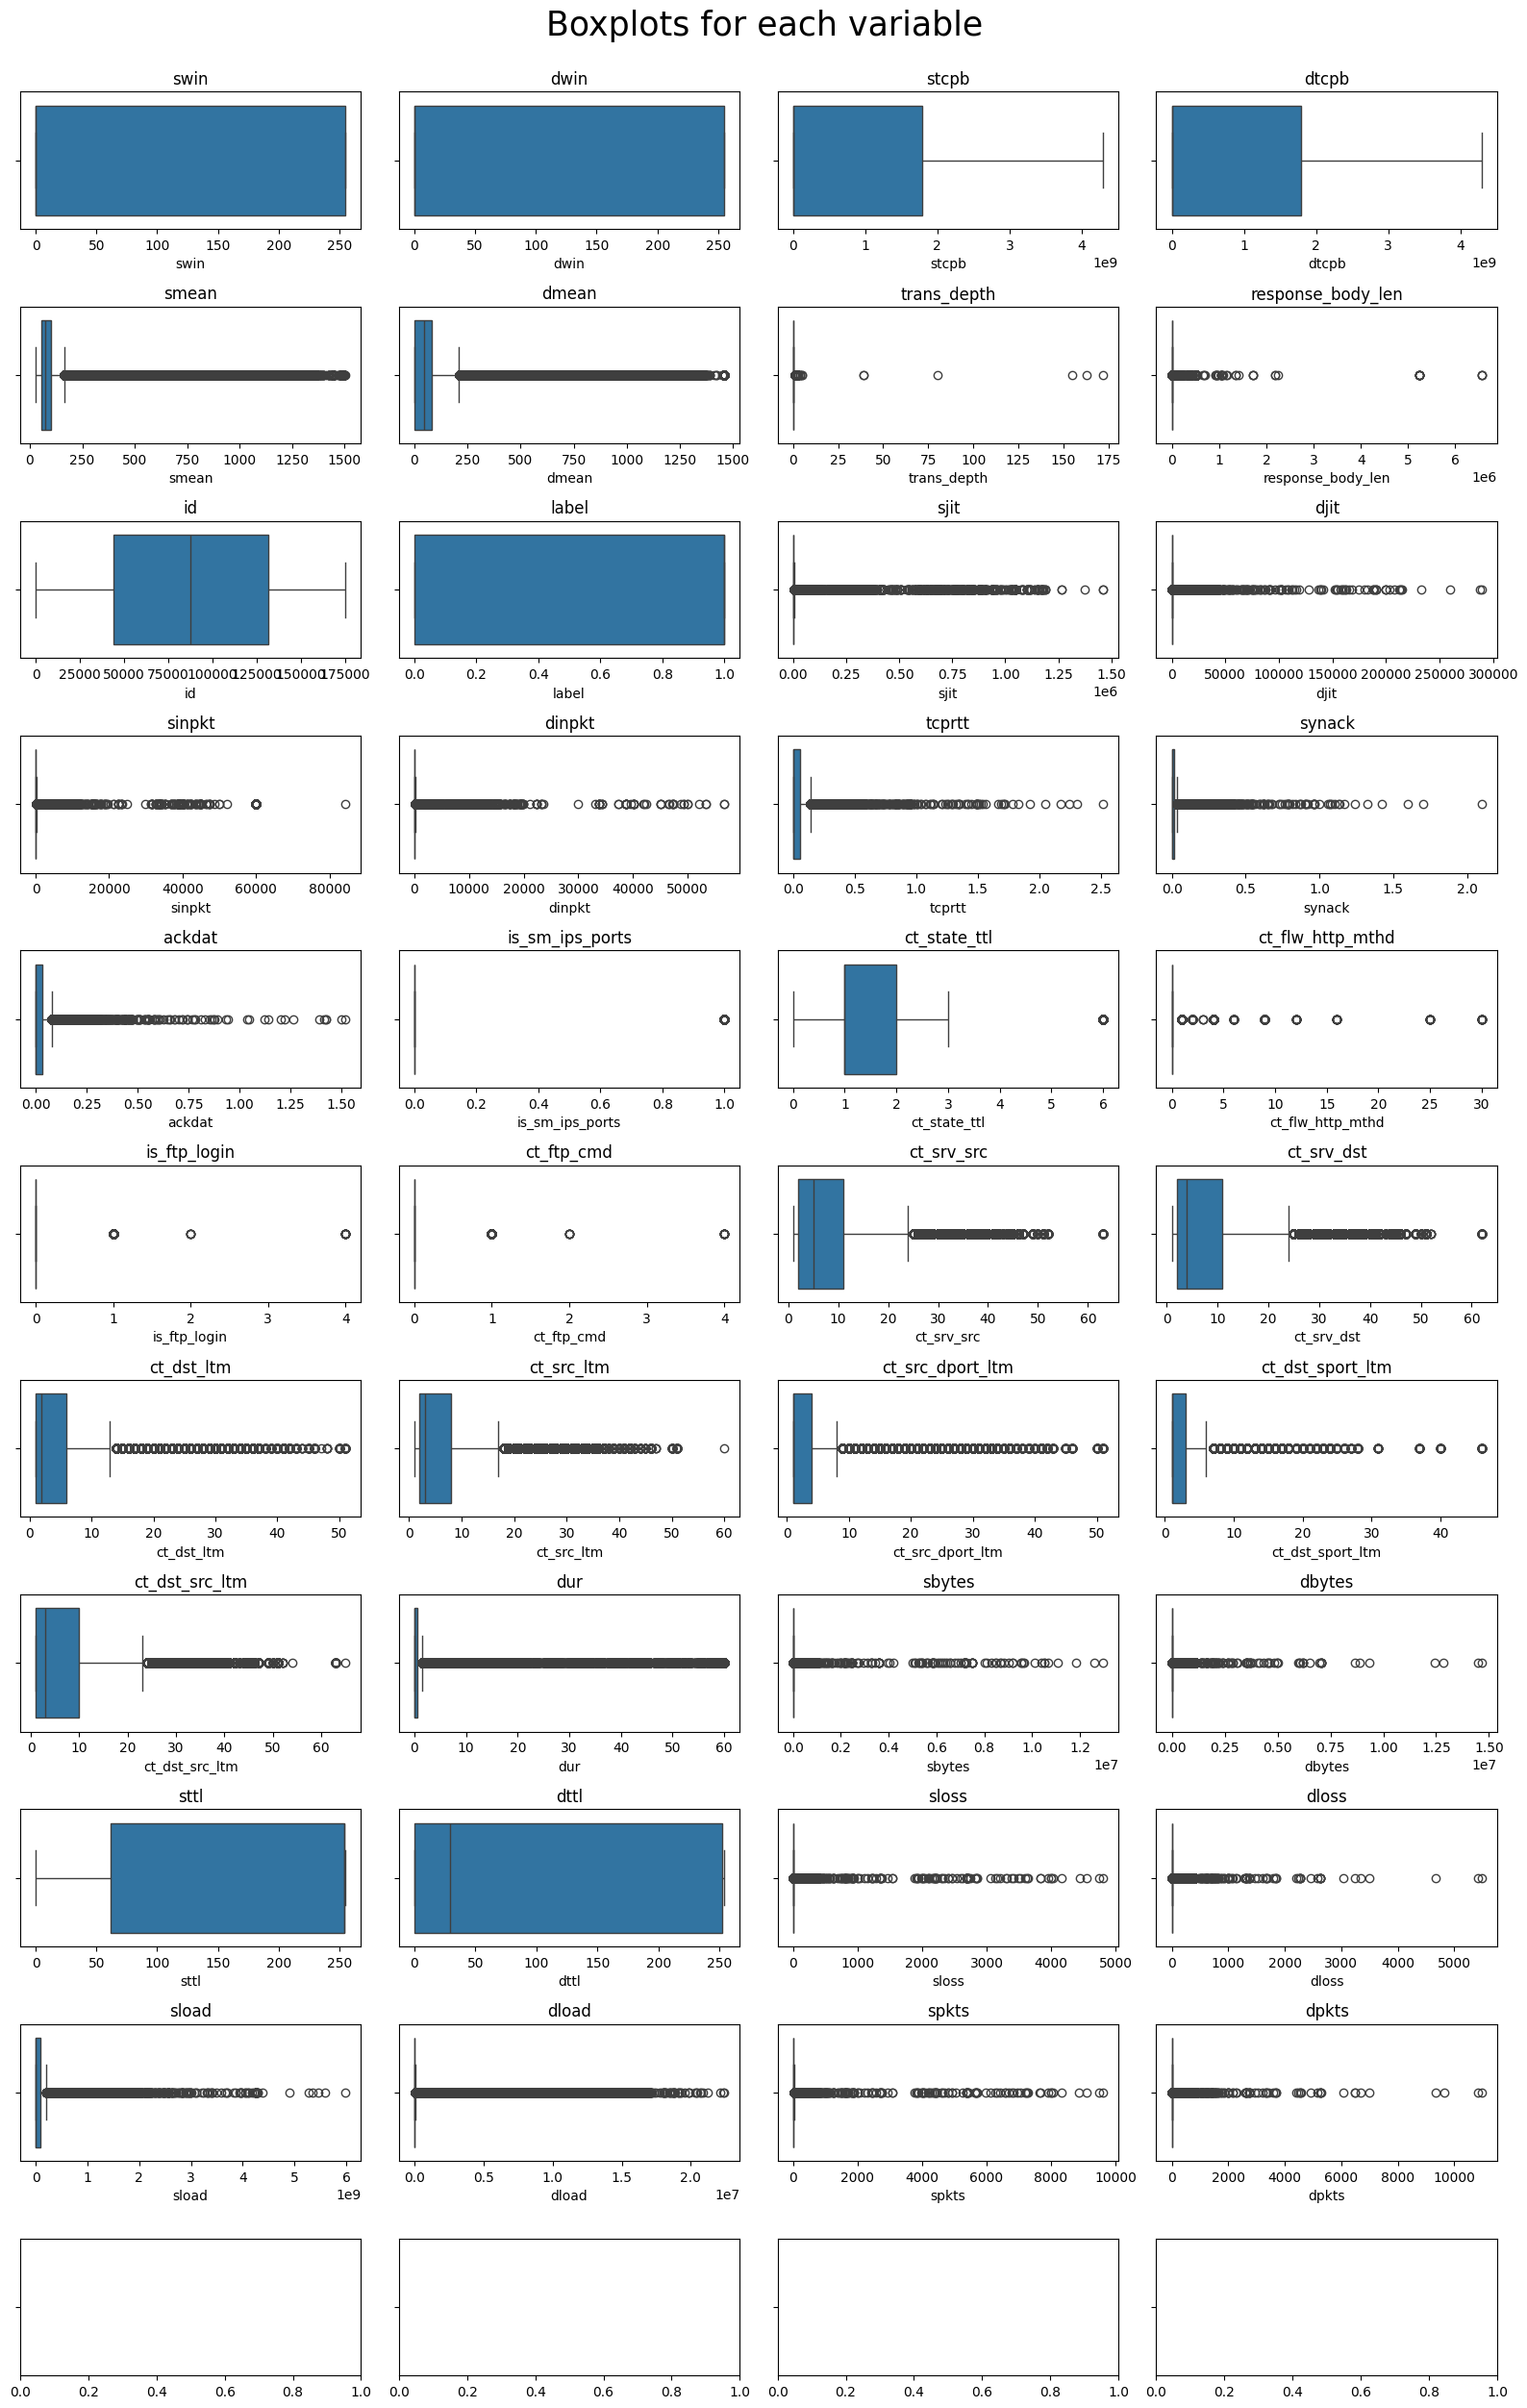

In [ ]:
# Check outliers dengan boxplot
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,25))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data)

boxplots_custom(dataset=df_cleaning, columns_list=numerical_features_outliers, rows=11, cols=4, suptitle='Boxplots for each variable')
plt.tight_layout()

In [ ]:
# Identifikasi Outliers dengan IQR
# Menghitung Q1, Q3, dan IQR
Q1 = numerical_features_outliers.quantile(0.25)
Q3 = numerical_features_outliers.quantile(0.75)
IQR = Q3 - Q1

# Batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengidentifikasi outliers
outliers = ((numerical_features_outliers < lower_bound) | (numerical_features_outliers > upper_bound))

# Menampilkan jumlah outliers per fitur sebelum
outliers_count = outliers.sum()
print("Jumlah outliers per fitur sebelum:")
print(outliers_count)

# Clipping outliers
for columns in numerical_features_outliers:
    numerical_features_outliers[columns] = numerical_features_outliers[columns].clip(lower=lower_bound[columns], upper=upper_bound[columns])

# Menampilkan jumlah outliers per fitur setelah
outliers_after_deal_clipping = ((numerical_features_outliers < lower_bound) | (numerical_features_outliers > upper_bound))
outliers_count_after_clipping = outliers_after_deal_clipping.sum()
print("Jumlah outliers per fitur setelah:")
print(outliers_count_after_clipping)

Jumlah outliers per fitur sebelum:
swin                     0
dwin                     0
stcpb                    0
dtcpb                    0
smean                19690
dmean                22697
trans_depth          16948
response_body_len    10723
id                       0
label                    0
sjit                 20205
djit                 20609
sinpkt               15717
dinpkt               17320
tcprtt               21852
synack               38551
ackdat               13634
is_sm_ips_ports       2632
ct_state_ttl          1838
ct_flw_http_mthd     16996
is_ftp_login          2443
ct_ftp_cmd            2443
ct_srv_src           22771
ct_srv_dst           22825
ct_dst_ltm           30290
ct_src_ltm           18116
ct_src_dport_ltm     35713
ct_dst_sport_ltm     35385
ct_dst_src_ltm       24432
dur                  15994
sbytes               23142
dbytes               30374
sttl                     0
dttl                     0
sloss                27947
dloss               

In [ ]:
# Check tipe data setelah dealing with outliers
df_cleaning.dtypes

,0
swin,float64
dwin,float64
stcpb,float64
dtcpb,float64
smean,float64
dmean,float64
trans_depth,float64
response_body_len,float64
id,float64
proto,object


In [ ]:
# Check data setelah dealing with outliers
df_cleaning.head()

,swin,dwin,stcpb,dtcpb,smean,dmean,trans_depth,response_body_len,id,proto,...,dbytes,sttl,dttl,sloss,dloss,service,sload,dload,spkts,dpkts
0,255.0,255.0,3.680557e+09,5.902739e+08,843.0,51.0,0.0,0.0,7.0,tcp,...,164.0,254.0,252.0,14.0,3.0,-,1.518140e+05,4169.455078,34.0,16.0
1,255.0,255.0,7.613877e+08,2.553413e+09,67.0,44.0,0.0,0.0,13.0,tcp,...,354.0,254.0,252.0,2.0,1.0,-,7.695512e+03,3943.154785,10.0,8.0
2,255.0,255.0,5.630874e+08,3.134542e+09,53.0,45.0,0.0,0.0,18.0,tcp,...,268.0,254.0,252.0,2.0,1.0,-,1.689468e+04,7867.792969,10.0,2.0
3,0.0,0.0,0.000000e+00,0.000000e+00,57.0,0.0,0.0,0.0,27.0,udp,...,0.0,254.0,0.0,0.0,0.0,dns,5.066666e+07,0.000000,2.0,0.0
4,255.0,255.0,3.754076e+09,0.000000e+00,73.0,55.0,0.0,0.0,31.0,tcp,...,3720.0,62.0,252.0,167.0,8.0,smtp,1.114080e+06,9599.328125,340.0,68.0


### III. Remove Duplicates


In [ ]:
# Check jumlah baris sebelum remove duplicates
print(len(df_cleaning))

175341


In [ ]:
# Check tipe data
df_cleaning.dtypes

,0
swin,float64
dwin,float64
stcpb,float64
dtcpb,float64
smean,float64
dmean,float64
trans_depth,float64
response_body_len,float64
id,float64
proto,object


In [ ]:
# Check duplicates
print(df_cleaning.duplicated().sum())

0


In [ ]:
# Drop duplicates
check_duplicates = df_cleaning.drop_duplicates()
print(len(check_duplicates))

175341


### IV. Feature Engineering



Referensi:
https://colab.research.google.com/github/goodboychan/chans_jupyter/blob/main/_notebooks/2020-07-08-02-Feature-selection-I-selecting-for-feature-information.ipynb#scrollTo=XF2gJxHsBY5a

https://hamhrmwn.medium.com/belajar-data-mining-preprocessing-data-dengan-google-colab-8f056a6f0e5b

https://saturncloud.io/blog/binning-a-column-with-python-pandas/#:~:text=Binning%20is%20the%20process%20of,30%E2%80%9D%2C%20and%20so%20on.

Akan dilakukan drop fitur label

In [ ]:
# Drop label karena tidak digunakan
drop_label = check_duplicates.drop(columns=['label'])

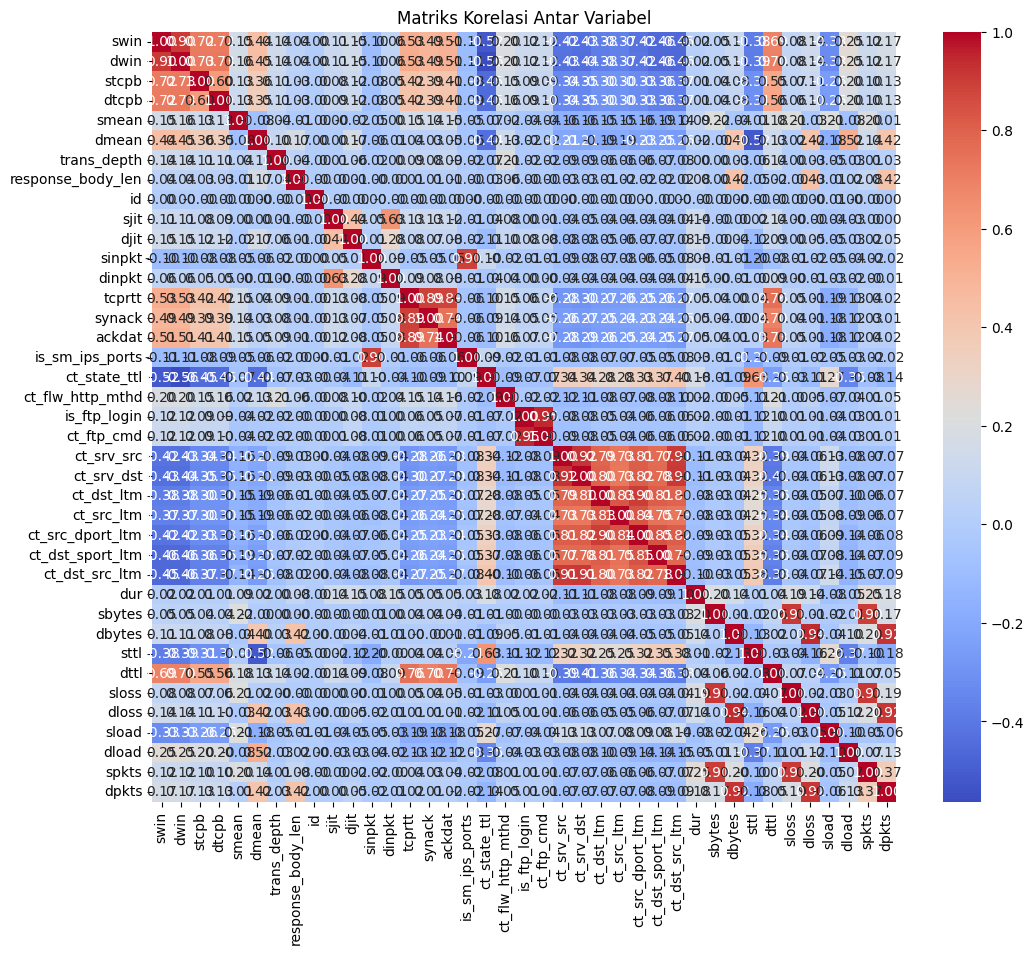

In [ ]:
# Visualisasi matriks korelasi menggunakan heatmap

continuous_features = ['swin', 'dwin', 'stcpb', 'dtcpb', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'id', 'sjit', 'djit', 'sinpkt', 'dinpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'sload', 'dload', 'spkts', 'dpkts']

df_continuous = drop_label[continuous_features]
corr_matrix = df_continuous.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True,
cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi Antar Variabel')
plt.show()

<Axes: >

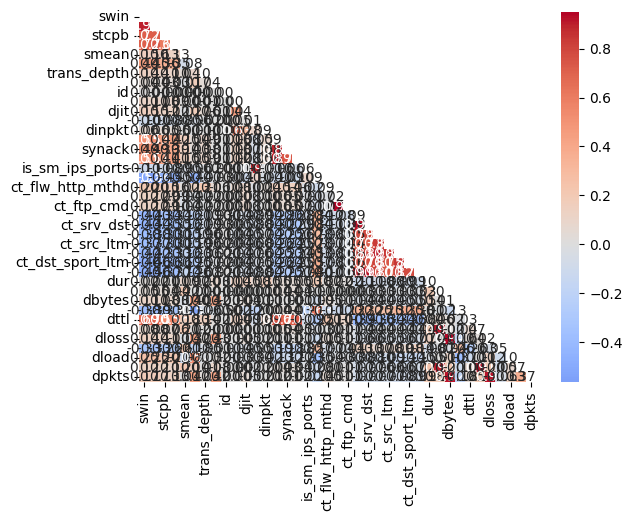

In [ ]:
# Mask dari korelasi sebelumnya
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', center=0, annot=True, fmt='.2f')

In [ ]:
for_feature = drop_label.copy()
numerical_for_feature = drop_label.select_dtypes(include=[np.number])

# Hitung correlation matrix dan ambil nilai absolutenya
corr_matrix = numerical_for_feature.corr().abs()

# True dan False di mask
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List kolom yang highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.95)]
print(to_drop)

# Drop features di to_drop list
drop_highly_correlated = drop_label.drop(to_drop,axis=1)

print("Jumlah kolom {} columns.".format(drop_highly_correlated.shape[1]))

[]
Jumlah kolom 43 columns.


Tidak ada feature yang diremove (karena tidak ada correlation lebih besar dari 0.95)

**Split Training Set and Validation Set**

In [ ]:
# Split into train_set and val_set
train_set_split, val_set_split = train_test_split(drop_highly_correlated, test_size=0.2, random_state=42)

## B. Data Preprocessing

**Data preprocessing** is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. **Feature Scaling:** Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. **Encoding Categorical Variables:** Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. **Handling Imbalanced Classes:** If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. **Dimensionality Reduction:** Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. **Normalization:** Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

### I. Feature Scaling



In [ ]:
train_set_split.dtypes

,0
swin,float64
dwin,float64
stcpb,float64
dtcpb,float64
smean,float64
dmean,float64
trans_depth,float64
response_body_len,float64
id,float64
proto,object


In [ ]:
# Pisahkan kolom numerik dan kategorikal
train_numerical_features = train_set_split.select_dtypes(include=['int64', 'float64']).columns.tolist()
train_categorical_features = train_set_split.select_dtypes(include=['object', 'category']).columns.tolist()

val_numerical_features = val_set_split.select_dtypes(include=['int64', 'float64']).columns.tolist()
val_categorical_features = val_set_split.select_dtypes(include=['object', 'category']).columns.tolist()


# Print hasilnya
print("Fitur Numerik Train:", train_numerical_features)
print("\nFitur Kategorikal Train:", train_categorical_features)
print("\nFitur Numerik Val:", val_numerical_features)
print("\nFitur Kategorikal Val:", val_categorical_features)

Fitur Numerik Train: ['swin', 'dwin', 'stcpb', 'dtcpb', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'id', 'sjit', 'djit', 'sinpkt', 'dinpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'sload', 'dload', 'spkts', 'dpkts']

Fitur Kategorikal Train: ['proto', 'attack_cat', 'state', 'service']

Fitur Numerik Val: ['swin', 'dwin', 'stcpb', 'dtcpb', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'id', 'sjit', 'djit', 'sinpkt', 'dinpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'sload', 'd

In [ ]:
# Pastikan untuk memilih hanya fitur numerik yang tidak termasuk 'id'
train_numerical_features_without_id = [col for col in train_numerical_features if col != 'id']
val_numerical_features_without_id = [col for col in train_numerical_features if col != 'id']

# Scaling untuk training set
scaler = StandardScaler()
train_set_split[train_numerical_features_without_id] = scaler.fit_transform(train_set_split[train_numerical_features_without_id])


val_set_split[val_numerical_features_without_id] = scaler.transform(val_set_split[val_numerical_features_without_id])


In [ ]:
print("Scaled Numerical Features in Training Data:")
print(train_set_split[train_numerical_features_without_id].head())

print("\nScaled Numerical Features in Validation Data:")
print(val_set_split[val_numerical_features_without_id].head())

Scaled Numerical Features in Training Data:
            swin      dwin     stcpb     dtcpb     smean     dmean  \
96203  -0.876063 -0.867145 -0.690650 -0.689845 -0.382505 -0.476814   
58960   1.141513  1.153231 -0.291757  1.395680 -0.302707  0.139824   
65069  -0.876063 -0.867145 -0.690650 -0.689845 -0.382505 -0.476814   
64133  -0.876063 -0.867145 -0.690650 -0.689845 -0.168047 -0.476814   
111445 -0.876063 -0.867145 -0.690650 -0.689845  0.590037 -0.476814   

        trans_depth  response_body_len      sjit      djit  ...    sbytes  \
96203     -0.119173          -0.037299 -0.108117 -0.146606  ... -0.048819   
58960     -0.119173          -0.037299  0.230374 -0.042007  ... -0.047329   
65069     -0.119173          -0.037299 -0.108117 -0.146606  ... -0.048819   
64133     -0.119173          -0.037299 -0.108117 -0.146606  ... -0.046817   
111445    -0.119173          -0.037299 -0.108117 -0.146606  ... -0.046501   

          dbytes      sttl      dttl     sloss     dloss     sload     d

In [ ]:
print("Columns in train_set_split after scaling:")
print(train_set_split.columns.tolist())

print("\nColumns in val_set_split after scaling:")
print(val_set_split.columns.tolist())


Columns in train_set_split after scaling:
['swin', 'dwin', 'stcpb', 'dtcpb', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'id', 'proto', 'attack_cat', 'sjit', 'djit', 'sinpkt', 'dinpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'sload', 'dload', 'spkts', 'dpkts']

Columns in val_set_split after scaling:
['swin', 'dwin', 'stcpb', 'dtcpb', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'id', 'proto', 'attack_cat', 'sjit', 'djit', 'sinpkt', 'dinpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'state', 'dur', 'sbytes', 'dbytes'

In [ ]:
# Gabungkan kembali fitur numerik yang sudah diskalakan dengan fitur lainnya (kategorikal dan 'id')
train_set_scaled = pd.concat([
    train_set_split[train_numerical_features_without_id],  # Fitur numerik setelah scaling
    train_set_split[train_categorical_features],          # Fitur kategorikal
    train_set_split[['id']]                               # Kolom 'id'
], axis=1)

val_set_scaled = pd.concat([
    val_set_split[val_numerical_features_without_id],    # Fitur numerik setelah scaling
    val_set_split[val_categorical_features],             # Fitur kategorikal
    val_set_split[['id']]                                # Kolom 'id'
], axis=1)


print("Training Data After Scaling and Combining with Other Features:")
print(train_set_scaled.head())

print("\nValidation Data After Scaling and Combining with Other Features:")
print(val_set_scaled.head())

Training Data After Scaling and Combining with Other Features:
            swin      dwin     stcpb     dtcpb     smean     dmean  \
96203  -0.876063 -0.867145 -0.690650 -0.689845 -0.382505 -0.476814   
58960   1.141513  1.153231 -0.291757  1.395680 -0.302707  0.139824   
65069  -0.876063 -0.867145 -0.690650 -0.689845 -0.382505 -0.476814   
64133  -0.876063 -0.867145 -0.690650 -0.689845 -0.168047 -0.476814   
111445 -0.876063 -0.867145 -0.690650 -0.689845  0.590037 -0.476814   

        trans_depth  response_body_len      sjit      djit  ...     dloss  \
96203     -0.119173          -0.037299 -0.108117 -0.146606  ... -0.135644   
58960     -0.119173          -0.037299  0.230374 -0.042007  ... -0.094616   
65069     -0.119173          -0.037299 -0.108117 -0.146606  ... -0.135644   
64133     -0.119173          -0.037299 -0.108117 -0.146606  ... -0.135644   
111445    -0.119173          -0.037299 -0.108117 -0.146606  ... -0.135644   

           sload     dload     spkts     dpkts  proto

In [ ]:
train_set_scaled.describe()

,swin,dwin,stcpb,dtcpb,smean,dmean,trans_depth,response_body_len,sjit,djit,...,dbytes,sttl,dttl,sloss,dloss,sload,dload,spkts,dpkts,id
count,1.402720e+05,1.402720e+05,1.402720e+05,1.402720e+05,1.402720e+05,1.402720e+05,1.402720e+05,1.402720e+05,1.402720e+05,1.402720e+05,...,1.402720e+05,1.402720e+05,1.402720e+05,1.402720e+05,1.402720e+05,1.402720e+05,1.402720e+05,1.402720e+05,1.402720e+05,140272.000000
mean,-4.391757e-17,-7.690640e-17,4.936294e-17,3.295084e-17,-3.596479e-17,1.971732e-17,4.571581e-18,-2.456750e-18,-1.109337e-17,-4.452543e-17,...,4.204335e-18,1.940832e-16,8.036358e-17,3.115260e-18,5.825283e-18,-3.034213e-17,9.852327e-18,-5.825283e-18,2.203477e-17,87631.428803
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,...,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,50636.379475
min,-8.760629e-01,-8.671452e-01,-6.906500e-01,-6.898454e-01,-5.271400e-01,-4.768144e-01,-1.191729e-01,-3.729908e-02,-1.081166e-01,-1.466064e-01,...,-1.037470e-01,-1.802445e+00,-7.120733e-01,-7.440542e-02,-1.356438e-01,-3.771479e-01,-2.707735e-01,-1.390227e-01,-1.701029e-01,1.000000
25%,-8.760629e-01,-8.671452e-01,-6.906500e-01,-6.898454e-01,-3.825055e-01,-4.768144e-01,-1.191729e-01,-3.729908e-02,-1.081166e-01,-1.466064e-01,...,-1.037470e-01,-1.192540e+00,-7.120733e-01,-7.440542e-02,-1.356438e-01,-3.770688e-01,-2.707735e-01,-1.314957e-01,-1.701029e-01,43783.750000
50%,-8.760629e-01,-8.671452e-01,-6.906500e-01,-6.898454e-01,-3.027071e-01,-3.028909e-01,-1.191729e-01,-3.729908e-02,-1.081166e-01,-1.466064e-01,...,-1.025499e-01,6.961993e-01,-4.441950e-01,-7.440542e-02,-1.356438e-01,-3.724457e-01,-2.701728e-01,-1.314957e-01,-1.513814e-01,87563.500000
75%,1.141513e+00,1.153231e+00,6.541936e-01,6.490725e-01,-1.680473e-01,-1.408258e-01,-1.191729e-01,-3.729908e-02,-5.767193e-02,-1.195642e-01,...,-9.760126e-02,6.961993e-01,1.615697e+00,-4.236906e-02,-9.461639e-02,7.609571e-02,-2.633232e-01,-5.622500e-02,-7.649543e-02,131554.250000
max,1.141513e+00,1.153231e+00,2.520026e+00,2.520460e+00,6.834261e+00,5.286378e+00,2.015968e+02,1.166465e+02,3.267382e+01,7.283064e+01,...,1.068660e+02,7.060365e-01,1.634171e+00,7.686091e+01,1.123616e+02,3.193265e+01,9.170963e+00,7.223372e+01,1.025547e+02,175339.000000


referensi:
https://medium.com/@rkukuh/melakukan-feature-scaling-pada-dataset-229531bb08de

### II. Feature Encoding



In [ ]:
print("Kolom kategorikal Training sebelum encoding:")
print(train_set_scaled[train_categorical_features].head())
print("\nKolom kategorikal Validation sebelum encoding:")
print(val_set_scaled[val_categorical_features].head())

Kolom kategorikal Training sebelum encoding:
       proto attack_cat state service
96203    udp    Generic   INT     dns
58960    tcp   Exploits   FIN       -
65069    udp    Generic   INT     dns
64133   unas        DoS   INT       -
111445   udp     Normal   INT       -

Kolom kategorikal Validation sebelum encoding:
       proto attack_cat state service
15482    udp    Fuzzers   INT       -
133349   tcp     Normal   FIN     ssh
80485    tcp   Exploits   FIN    http
29972    wsn        DoS   INT       -
18339    udp    Generic   INT     dns


In [ ]:
# Remove 'attack_cat' dari categorical features agar tidak di encode
train_categorical_features_encode = [col for col in train_categorical_features if col != 'attack_cat']
val_categorical_features_encode = [col for col in val_categorical_features if col != 'attack_cat']


ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Fit dan transform training data
train_ohe = pd.DataFrame(ohe.fit_transform(train_set_scaled[train_categorical_features_encode]),
                         columns=ohe.get_feature_names_out(train_categorical_features_encode),
                         index=train_set_scaled.index)

# Transform validation data (no fitting, only transforming)
val_ohe = pd.DataFrame(ohe.transform(val_set_scaled[val_categorical_features_encode]),
                       columns=ohe.get_feature_names_out(train_categorical_features_encode),  # use the same columns as training
                       index=val_set_scaled.index)

# Drop  original categorical features (excluding 'attack_cat') dan append one-hot encoded features
train_set_split = train_set_scaled.drop(columns=train_categorical_features_encode).join(train_ohe)
val_set_split = val_set_scaled.drop(columns=val_categorical_features_encode).join(val_ohe)

print("Encoded Training Data (with 'attack_cat' preserved):")
print(train_set_split.head())

print("\nEncoded Validation Data (with 'attack_cat' preserved):")
print(val_set_split.head())


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Encoded Training Data (with 'attack_cat' preserved):
            swin      dwin     stcpb     dtcpb     smean     dmean  \
96203  -0.876063 -0.867145 -0.690650 -0.689845 -0.382505 -0.476814   
58960   1.141513  1.153231 -0.291757  1.395680 -0.302707  0.139824   
65069  -0.876063 -0.867145 -0.690650 -0.689845 -0.382505 -0.476814   
64133  -0.876063 -0.867145 -0.690650 -0.689845 -0.168047 -0.476814   
111445 -0.876063 -0.867145 -0.690650 -0.689845  0.590037 -0.476814   

        trans_depth  response_body_len      sjit      djit  ...  service_ftp  \
96203     -0.119173          -0.037299 -0.108117 -0.146606  ...          0.0   
58960     -0.119173          -0.037299  0.230374 -0.042007  ...          0.0   
65069     -0.119173          -0.037299 -0.108117 -0.146606  ...          0.0   
64133     -0.119173          -0.037299 -0.108117 -0.146606  ...          0.0   
111445    -0.119173          -0.037299 -0.108117 -0.146606  ...          0.0   

        service_ftp-data  service_http  servi

In [ ]:
print("Encoded Columns in Training Data:")
print(train_set_split.columns)

# Cek hasil encoding untuk ktiap kolom kategorikal setelah One-Hot Encoding
print("\nEncoded 'proto' Feature (after One-Hot Encoding):")
print(train_set_split.filter(regex='^proto').head())
print("\nEncoded 'attack_cat' Feature (after One-Hot Encoding):")
print(train_set_split.filter(regex='^attack_cat').head())
print("\nEncoded 'state' Feature (after One-Hot Encoding):")
print(train_set_split.filter(regex='^state').head())
print("\nEncoded 'service' Feature (after One-Hot Encoding):")
print(train_set_split.filter(regex='^service').head())


Encoded Columns in Training Data:
Index(['swin', 'dwin', 'stcpb', 'dtcpb', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'sjit', 'djit',
       ...
       'service_ftp', 'service_ftp-data', 'service_http', 'service_irc',
       'service_pop3', 'service_radius', 'service_smtp', 'service_snmp',
       'service_ssh', 'service_ssl'],
      dtype='object', length=191)

Encoded 'proto' Feature (after One-Hot Encoding):
        proto_a/n  proto_aes-sp3-d  proto_any  proto_argus  proto_aris  \
96203         0.0              0.0        0.0          0.0         0.0   
58960         0.0              0.0        0.0          0.0         0.0   
65069         0.0              0.0        0.0          0.0         0.0   
64133         0.0              0.0        0.0          0.0         0.0   
111445        0.0              0.0        0.0          0.0         0.0   

        proto_arp  proto_ax.25  proto_bbn-rcc  proto_bna  proto_br-sat-mon  \
96203         0.0          0.0            0.0

Untuk bagian feature encoding digunakan metode One-Hot Encoding karena kolom kategorical termasuk nominal variabel bukan ordinal variabel

### III. Handling Imbalanced Dataset



referensi:
https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#imblearn.over_sampling.SMOTE


In [ ]:
# Data awal
X = train_set_split.drop(columns=['attack_cat'])  # Fitur
y = train_set_split['attack_cat']  # Target kategorikal

# Encode target menjadi numerik sementara
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Terapkan SMOTE hanya pada train_set_split
print("Distribusi sebelum SMOTE:")
for label, count in Counter(y).items():
    print(f"{label}: {count}")

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

# Kembalikan target ke kategori asli
y_resampled = le.inverse_transform(y_resampled)

# Periksa distribusi setelah SMOTE
print("\nDistribusi setelah SMOTE:")
for label, count in Counter(y_resampled).items():
    print(f"{label}: {count}")

# Data hasil SMOTE
X_train_smote = pd.DataFrame(X_resampled, columns=X.columns)
y_train_smote = pd.Series(y_resampled)

# Val_set_split tetap tidak diubah dan digunakan untuk validasi
X_val = val_set_split.drop(columns=['attack_cat'])
y_val = val_set_split['attack_cat']

# Periksa distribusi pada data validasi
print("\nDistribusi pada data validasi (val_set_split):")
for label, count in Counter(y_val).items():
    print(f"{label}: {count}")


Distribusi sebelum SMOTE:
Generic: 31945
Exploits: 26694
DoS: 9832
Normal: 44812
Fuzzers: 14540
Analysis: 1586
Reconnaissance: 8434
Backdoor: 1387
Shellcode: 938
Worms: 104

Distribusi setelah SMOTE:
Generic: 44812
Exploits: 44812
DoS: 44812
Normal: 44812
Fuzzers: 44812
Analysis: 44812
Reconnaissance: 44812
Backdoor: 44812
Shellcode: 44812
Worms: 44812

Distribusi pada data validasi (val_set_split):
Fuzzers: 3644
Normal: 11188
Exploits: 6699
DoS: 2432
Generic: 8055
Backdoor: 359
Reconnaissance: 2057
Analysis: 414
Shellcode: 195
Worms: 26


In [ ]:
# Gabungkan fitur dan target menjadi satu DataFrame
smote_data = pd.concat([X_train_smote, y_train_smote.rename("attack_cat")], axis=1)
print(smote_data.head())


       swin      dwin     stcpb     dtcpb     smean     dmean  trans_depth  \
0 -0.876063 -0.867145 -0.690650 -0.689845 -0.382505 -0.476814    -0.119173   
1  1.141513  1.153231 -0.291757  1.395680 -0.302707  0.139824    -0.119173   
2 -0.876063 -0.867145 -0.690650 -0.689845 -0.382505 -0.476814    -0.119173   
3 -0.876063 -0.867145 -0.690650 -0.689845 -0.168047 -0.476814    -0.119173   
4 -0.876063 -0.867145 -0.690650 -0.689845  0.590037 -0.476814    -0.119173   

   response_body_len      sjit      djit  ...  service_ftp-data  service_http  \
0          -0.037299 -0.108117 -0.146606  ...               0.0           0.0   
1          -0.037299  0.230374 -0.042007  ...               0.0           0.0   
2          -0.037299 -0.108117 -0.146606  ...               0.0           0.0   
3          -0.037299 -0.108117 -0.146606  ...               0.0           0.0   
4          -0.037299 -0.108117 -0.146606  ...               0.0           0.0   

   service_irc  service_pop3  service_radius


=== Distribusi Kelas Sebelum SMOTE ===
Jumlah sampel per kelas sebelum SMOTE:
Counter({'Normal': 44812, 'Generic': 31945, 'Exploits': 26694, 'Fuzzers': 14540, 'DoS': 9832, 'Reconnaissance': 8434, 'Analysis': 1586, 'Backdoor': 1387, 'Shellcode': 938, 'Worms': 104})


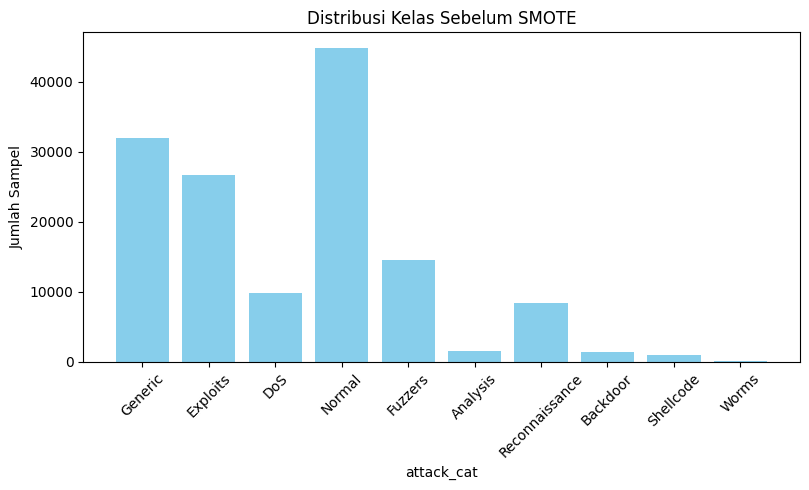


=== Distribusi Kelas Setelah SMOTE ===
Jumlah sampel per kelas setelah SMOTE:
Counter({'Generic': 44812, 'Exploits': 44812, 'DoS': 44812, 'Normal': 44812, 'Fuzzers': 44812, 'Analysis': 44812, 'Reconnaissance': 44812, 'Backdoor': 44812, 'Shellcode': 44812, 'Worms': 44812})


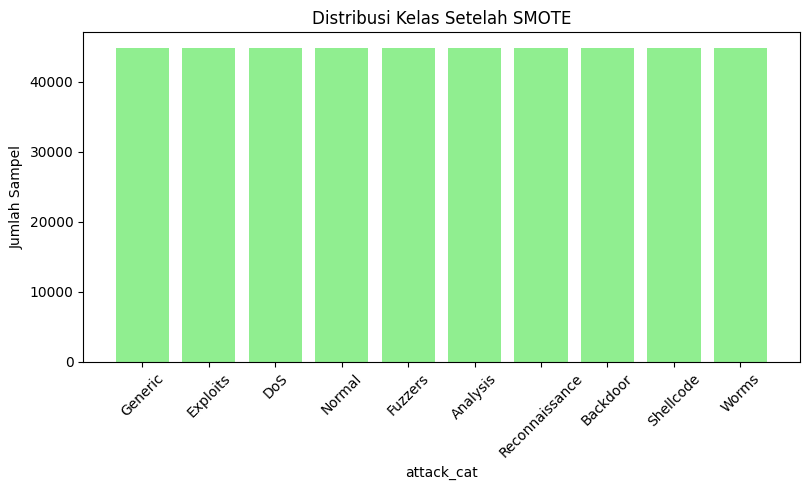

In [ ]:
# Distribusi sebelum SMOTE
print("\n=== Distribusi Kelas Sebelum SMOTE ===")
print(f"Jumlah sampel per kelas sebelum SMOTE:\n{Counter(y)}")

plt.figure(figsize=(8, 5))
plt.bar(Counter(y).keys(), Counter(y).values(), color="skyblue")
plt.title("Distribusi Kelas Sebelum SMOTE")
plt.xlabel("attack_cat")
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylabel("Jumlah Sampel")
plt.show()

# Distribusi setelah SMOTE
print("\n=== Distribusi Kelas Setelah SMOTE ===")
print(f"Jumlah sampel per kelas setelah SMOTE:\n{Counter(y_resampled)}")

plt.figure(figsize=(8, 5))
plt.bar(Counter(y_resampled).keys(), Counter(y_resampled).values(), color="lightgreen")
plt.title("Distribusi Kelas Setelah SMOTE")
plt.xlabel("attack_cat")
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylabel("Jumlah Sampel")
plt.show()


### IV. Dimensionality Reduction



PCA method:
referensi https://developer.ibm.com/tutorials/awb-reducing-dimensionality-with-principal-component-analysis/


Jumlah fitur sebelum PCA: 189
Jumlah fitur setelah PCA: 24


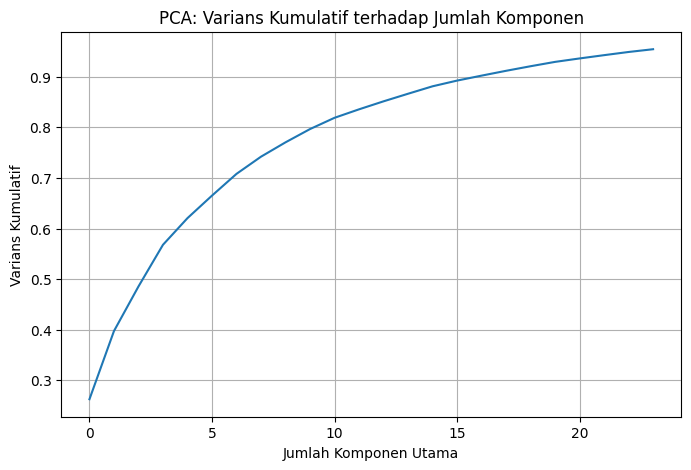

Dataset dengan target berhasil disimpan ke file: Dataset_training.csv


In [ ]:
# Data setelah scaling, encoding, dan handling imbalance
X = X_train_smote  # Fitur hasil SMOTE
y = y_train_smote  # Target hasil SMOTE

# Simpan kolom 'id' untuk ditambahkan kembali setelah PCA
id_column = X['id'] if 'id' in X.columns else None

# Hapus kolom 'id' dari data sebelum PCA
X = X.drop(columns=['id']) if 'id' in X.columns else X

# Inisialisasi PCA dengan jumlah komponen yang diinginkan
pca = PCA(n_components=0.95)  # Mempertahankan 95% varians
X_pca = pca.fit_transform(X)

# Jumlah komponen setelah PCA
print(f"Jumlah fitur sebelum PCA: {X.shape[1]}")
print(f"Jumlah fitur setelah PCA: {X_pca.shape[1]}")

# Plot varians kumulatif untuk memilih jumlah komponen optimal
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Jumlah Komponen Utama')
plt.ylabel('Varians Kumulatif')
plt.title('PCA: Varians Kumulatif terhadap Jumlah Komponen')
plt.grid()
plt.show()

# Data hasil PCA siap digunakan
X_train_pca = pd.DataFrame(X_pca)  # Data train setelah PCA
y_train_pca = y_train_smote  # Target tetap sama

# Jika kolom 'id' ada, tambahkan kembali setelah PCA
if id_column is not None:
    X_train_pca['id'] = id_column.values

# Tambahkan target ke DataFrame hasil PCA
X_train_pca['attack_cat'] = y_train_pca.values  # Tambahkan kolom target

# Simpan dataset ke file CSV
output_file = "Dataset_training.csv"  # Nama file output
X_train_pca.to_csv(output_file, index=False)

print(f"Dataset dengan target berhasil disimpan ke file: {output_file}")


In [ ]:
X_train_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,id,attack_cat
0,-3.902906,1.706695,2.637616,-2.012662,0.126837,-0.009353,0.051470,-0.190378,-0.030118,-0.062828,...,0.203539,-0.125387,-0.254257,-0.126374,-0.197983,-0.139037,-0.140041,0.312473,33410.0,Generic
1,2.217551,-1.102354,0.357538,-0.822551,-0.226885,-0.133734,-1.064802,-0.042782,-0.099876,0.303290,...,-0.592746,0.305036,-0.150468,-0.347995,-0.334979,0.991498,-0.110283,0.721717,60131.0,Exploits
2,-5.339128,3.194144,5.883809,-4.596914,0.330919,-0.286732,-0.235230,0.187544,0.081153,0.483874,...,-0.889134,0.450105,0.497797,0.221225,-0.230488,-0.705022,-0.352580,0.125133,84486.0,Generic
3,-1.939537,-0.137656,-1.160483,1.011959,-0.203322,0.063314,0.061526,-0.300830,-0.160591,-0.576427,...,0.358768,-0.084359,-0.026068,0.104539,0.126902,0.117203,0.127591,-0.221200,80691.0,DoS
4,-3.385404,1.626789,2.903962,-2.077868,0.000503,-0.744426,-1.174285,0.544086,0.053243,0.533828,...,-1.454450,0.200374,-0.366236,0.495913,-0.616620,-0.460780,-0.320609,0.447916,93957.0,Normal


# 3. Compile Preprocessing Pipeline



**Pembuatan pipeline**

In [ ]:
numerical_features = ['swin',
 'dwin',
 'stcpb',
 'dtcpb',
 'smean',
 'dmean',
 'trans_depth',
 'response_body_len',
 'sjit',
 'djit',
 'sinpkt',
 'dinpkt',
 'tcprtt',
 'synack',
 'ackdat',
 'is_sm_ips_ports',
 'ct_state_ttl',
 'ct_flw_http_mthd',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_srv_src',
 'ct_srv_dst',
 'ct_dst_ltm',
 'ct_src_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'dur',
 'sbytes',
 'dbytes',
 'sttl',
 'dttl',
 'sloss',
 'dloss',
 'sload',
 'dload',
 'spkts',
 'dpkts']
categorical_features = ['proto', 'state', 'service']



In [ ]:
numerical_features

['swin',
 'dwin',
 'stcpb',
 'dtcpb',
 'smean',
 'dmean',
 'trans_depth',
 'response_body_len',
 'sjit',
 'djit',
 'sinpkt',
 'dinpkt',
 'tcprtt',
 'synack',
 'ackdat',
 'is_sm_ips_ports',
 'ct_state_ttl',
 'ct_flw_http_mthd',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_srv_src',
 'ct_srv_dst',
 'ct_dst_ltm',
 'ct_src_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'dur',
 'sbytes',
 'dbytes',
 'sttl',
 'dttl',
 'sloss',
 'dloss',
 'sload',
 'dload',
 'spkts',
 'dpkts']

In [ ]:
categorical_features

['proto', 'state', 'service']

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.base import BaseEstimator, TransformerMixin


class FeatureEngineering(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.to_drop = []

    def fit(self, X, y=None):
        dataframe = pd.DataFrame(X)

        numerical_features = dataframe.select_dtypes(include=['number']).columns.tolist()

        # Compute the correlation matrix
        corr_matrix = dataframe[numerical_features].corr().abs()

        # Mask the upper triangle of the correlation matrix
        mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
        tri_df = corr_matrix.mask(mask)

        # Identify highly correlated features (r > 0.95)
        self.to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.95)]

        return self

    def transform(self, X):
        dataframe = pd.DataFrame(X)

        # Drop the highly correlated features
        drop_highly_correlated = dataframe.drop(columns=self.to_drop)

        return drop_highly_correlated

class OutlierHandler(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        dataframe = pd.DataFrame(X)

        numerical_features = dataframe.select_dtypes(include=['number']).columns.tolist()

        # Calculate IQR for numerical features
        Q1 = dataframe[numerical_features].quantile(0.25)
        Q3 = dataframe[numerical_features].quantile(0.75)
        IQR = Q3 - Q1

        # Define lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Apply clipping to outliers
        for column in numerical_features:
            dataframe[column] = dataframe[column].clip(lower=lower_bound[column], upper=upper_bound[column])

        return dataframe

numerical_pipeline = ImbPipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

onehot_pipeline = ImbPipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot_encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('onehot', onehot_pipeline, categorical_features)
    ]
)

pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ("feature_engineering", FeatureEngineering()),  # Remove highly correlated features
    ("outlier_handler", OutlierHandler()),      # Handle outliers using IQR
    ("smote", SMOTE(random_state=42)),
    ("pca", PCA(n_components=0.95)),
    ('final_transformer', None)
])


**Contoh penggunaan pipeline**

In [ ]:
# Split data sebelum preprocessing
x = df_train.drop(['attack_cat', 'id', 'label'], axis=1)
y = df_train['attack_cat']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

x_train.shape

(140272, 41)

In [ ]:
# Fit and transform the training set, transform the validation set

pipeline.fit(x_train, y_train)
train_set = pipeline.transform(x_train)

In [ ]:
val_set = pipeline.transform(x_val)

jadi ini ada train_data yaitu data training yang udah melalui semua proses, sedangkan val_data itu data validasi dimana dia ga ngelalui smote dan pca. Jadi nanti kalau mau nge run itu bagian awal aja yg read link terus langsung bagian 3 yang pipeline aja ya manggil fungsinya, yang bagian 1 dan 2 jangan di run itu buat ambil data aja. Thanks:)

# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `attack_cat`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

## A. Naive Bayes

In [ ]:
import numpy as np
import pickle

# Implementation of gaussian naive bayes classifier from scratch
# @author: Rayhan Maheswara Pramanda
# @date: 2024-12-07

class GaussianNaiveBayes:
    '''
    Gaussian Naive Bayes classifier implementation from scratch
    '''
    def __init__(self, var_smoothing = 1e-9):
        self.classes = []
        self.mean = {}
        self.std = {}
        self.priors = {}

        # Regularisation to avoid division by zero when calculating likelihood, this is different from Laplace Additive Smoothing
        # Variance can be 0 if the data points are identical for a certain class
        self.var_smoothing = var_smoothing

    def fit(self, x, y):
        '''
        Fit model to the training data

        Parameters:
            x -> Training data (features)
            y -> Target values (class labels)
        '''

        if len(x) != len(y): # Check if the number of samples in the features and target are the same
            raise ValueError('Length of x and y must be the same')

        self.classes = np.unique(y) # Get unique class labels

        for c in self.classes:
            x_c = x[y == c] # Get data points for the current class
            self.mean[c] = x_c.mean(axis=0)
            self.std[c] = np.maximum(x_c.std(axis=0), self.var_smoothing) # If the standard deviation is lower than the smoothing value (could be zero), use the smoothing value instead
            self.priors[c] = len(x_c) / len(x)

    def calculate_log_likelihood(self, x, mean, std):
        '''
        Calculate log likelihood of the data given the mean and standard deviation using Gaussian Probability Density Function
        Log likelihood is used to avoid underflow when multiplying small probabilities

        Parameters:
            x -> Data point (features)
            mean -> Mean for each feature
            std -> Standard deviation for each feature
        '''
        return (-0.5 * np.sum(np.log(2 * np.pi * std**2))) - np.sum(((x - mean)**2) / (2 * std**2))


    def calculate_log_posterior(self, x):
        '''
        Calculate posterior probabilities for a single data point

        Parameters:
            x -> Data point
        '''
        log_posteriors = {}

        for c in self.classes:
            log_likelihood = self.calculate_log_likelihood(x, self.mean[c], self.std[c]) # Compute the log likelihood P(x | c)
            log_posteriors[c] = np.log(self.priors[c]) + log_likelihood

        return log_posteriors

    def predict(self, x):
        '''
        Predict class labels for the input data

        Parameters:
            x -> Test data
        '''
        x = np.array(x, dtype=np.float64)  # Ensure x is a numpy array of floats
        y_pred = []

        for item in x:
            log_posteriors = self.calculate_log_posterior(item)
            y_pred.append(max(log_posteriors, key=log_posteriors.get)) # Get the class with the highest posterior probability

        return y_pred

    def save_model(self, filename):
        '''
        Save model to a file

        Parameters:
            filename -> Name of model file
        '''
        with open(filename, 'wb') as file:
            pickle.dump(self, file)
        print(f'Model saved as {filename}')

    def load_model(filename):
        '''
        Load model from a file

        Parameters:
            filename -> Name of model file
        '''
        with open(filename, 'rb') as file:
            model = pickle.load(file)
        print(f'Model {filename} has been loaded')

        return model


In [ ]:
gnb_model = GaussianNaiveBayes()

In [ ]:
y_train = y_train.reset_index(drop=True)  # Reset index if y_train is a pandas Series

In [ ]:
gnb_model.fit(train_set, y_train)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = gnb_model.predict(val_set)


In [ ]:
accuracy = accuracy_score(y_val, y_pred)

print(f"Accuracy (GNB from scratch): {accuracy}")
print("Classification Report:")
print(classification_report(y_val, y_pred))

Accuracy (GNB from scratch): 0.6675411331945593
Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       414
      Backdoor       0.00      0.00      0.00       359
           DoS       0.24      0.78      0.37      2432
      Exploits       0.70      0.41      0.52      6699
       Fuzzers       0.38      0.57      0.46      3644
       Generic       0.97      0.96      0.96      8055
        Normal       0.93      0.79      0.86     11188
Reconnaissance       0.18      0.01      0.02      2057
     Shellcode       0.00      0.00      0.00       195
         Worms       0.00      0.00      0.00        26

      accuracy                           0.67     35069
     macro avg       0.34      0.35      0.32     35069
  weighted avg       0.72      0.67      0.67     35069



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


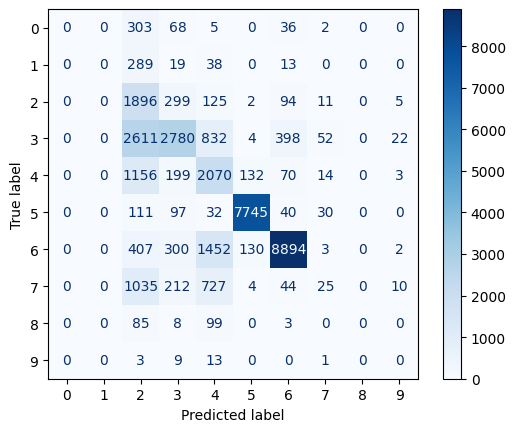

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_set, y_train)
y_pred = gnb.predict(val_set)
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy (GNB SK-Learn): {accuracy}")

print("Classification Report:")
print(classification_report(y_val, y_pred))

Accuracy (GNB SK-Learn): 0.6675411331945593
Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       414
      Backdoor       0.00      0.00      0.00       359
           DoS       0.24      0.78      0.37      2432
      Exploits       0.70      0.41      0.52      6699
       Fuzzers       0.38      0.57      0.46      3644
       Generic       0.97      0.96      0.96      8055
        Normal       0.93      0.79      0.86     11188
Reconnaissance       0.18      0.01      0.02      2057
     Shellcode       0.00      0.00      0.00       195
         Worms       0.00      0.00      0.00        26

      accuracy                           0.67     35069
     macro avg       0.34      0.35      0.32     35069
  weighted avg       0.72      0.67      0.67     35069



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
test_data = pipeline.transform(df_test)

test_data

array([[ 3.2092263 ,  1.95386707,  1.31268984, ...,  0.35924386,
         0.18304265, -0.60801551],
       [ 3.17439395,  2.30243199,  1.78173028, ...,  0.4403178 ,
         0.42490577, -1.17463049],
       [ 2.97669756,  1.37441192,  0.90130638, ...,  0.02786776,
        -0.15011257,  0.3877466 ],
       ...,
       [-1.84004731, -0.73714811,  1.05818029, ..., -0.51418152,
         0.02948197, -0.1059718 ],
       [-2.00852552, -0.46857836,  0.89328529, ...,  0.38408838,
         0.00780388,  0.05703031],
       [-1.61381719, -1.00995466,  1.40586055, ...,  0.17134464,
         0.01759047,  0.02131861]])

In [ ]:
y_pred = gnb_model.predict(test_data)

y_pred

['Fuzzers',
 'Fuzzers',
 'Fuzzers',
 'DoS',
 'Normal',
 'Generic',
 'Generic',
 'Fuzzers',
 'Fuzzers',
 'DoS',
 'Generic',
 'Generic',
 'Exploits',
 'Exploits',
 'Generic',
 'Generic',
 'Fuzzers',
 'Normal',
 'DoS',
 'Exploits',
 'Generic',
 'DoS',
 'Fuzzers',
 'DoS',
 'Exploits',
 'Exploits',
 'Exploits',
 'Fuzzers',
 'Generic',
 'Generic',
 'Normal',
 'Exploits',
 'Fuzzers',
 'Fuzzers',
 'DoS',
 'Fuzzers',
 'Exploits',
 'Exploits',
 'Exploits',
 'Fuzzers',
 'Normal',
 'Generic',
 'Generic',
 'DoS',
 'DoS',
 'Fuzzers',
 'Normal',
 'Normal',
 'DoS',
 'Generic',
 'DoS',
 'DoS',
 'Normal',
 'Exploits',
 'Fuzzers',
 'Fuzzers',
 'Normal',
 'Generic',
 'Exploits',
 'Generic',
 'DoS',
 'DoS',
 'Normal',
 'Fuzzers',
 'DoS',
 'Normal',
 'Normal',
 'Normal',
 'Generic',
 'Normal',
 'Normal',
 'Generic',
 'Normal',
 'Generic',
 'Exploits',
 'Generic',
 'DoS',
 'DoS',
 'DoS',
 'Normal',
 'Fuzzers',
 'Normal',
 'Fuzzers',
 'DoS',
 'DoS',
 'Fuzzers',
 'DoS',
 'Exploits',
 'DoS',
 'Exploits',
 'Norm

In [ ]:

submission_gnb = pd.DataFrame(y_pred, columns=['attack_cat'])
merged_df = pd.concat([df_test['id'].reset_index(drop=True), submission_gnb], axis=1)

# Save to CSV
merged_df.to_csv('submission_gnb_nosmote.csv', index=False)

## B. KNN

**THE ACTUAL DATASET IS TOO LARGE FOR GOOGLE COLLAB HENCE WE USE DUMMY DATA FOR COMPARISON. PLEASE RUN IT LOCALLY.**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)  # K = 3 neighbors
knn.fit(train_set, y_train)
y_pred = knn.predict(val_set)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (knn SK-Learn): {accuracy}")

Accuracy (knn SK-Learn): 0.318


In [ ]:
import numpy as np
import pickle

class KNN:
    def __init__(self, k_neighbors=3, metric='euclidean', p=2):
        """
        Initialize the KNN model.

        Parameters:
        - k_neighbors: Number of neighbors to consider.
        - metric: Distance metric ('euclidean', 'manhattan', 'minkowski').
        """
        self.k_neighbors = k_neighbors
        self.metric = metric
        self.p = p
        self.x_train = None
        self.y_train = None

    def fit(self, x, y):
        self.x_train = np.array(x)
        self.y_train = np.array(y)

    def compute_distances(self, x):
        if self.metric == 'euclidean':
            distances = np.sqrt(((x[:, np.newaxis] - self.x_train) ** 2).sum(axis=2))
        elif self.metric == 'manhattan':
            distances = np.abs(x[:, np.newaxis] - self.x_train).sum(axis=2)
        elif self.metric == 'minkowski':
            distances = (((np.abs(x[:, np.newaxis] - self.x_train)) ** self.p).sum(axis=2)) ** (1 / self.p)
        else:
            raise ValueError(f"Unsupported metric: {self.metric}")
        return distances

    def predict(self, x):
        """Predict the class labels for the provided data."""
        x = np.array(x)
        distances = self.compute_distances(x)

        neighbors = np.argsort(distances, axis=1)[:, :self.k_neighbors]
        predictions = []

        for neighbor_indices in neighbors:
            neighbor_labels = self.y_train[neighbor_indices]
            predictions.append(np.bincount(neighbor_labels).argmax())

        return np.array(predictions)

    def save_model(self, filename):
        with open(filename, 'wb') as file:
            pickle.dump(self, file)

    def load_model(filename):
        with open(filename, 'rb') as file:
            model = pickle.load(file)
        return model

In [ ]:

train_set = np.random.rand(1000, 10)  # Small training set
y_train = np.random.randint(0, 3, size=1000)
val_set = np.random.rand(1000, 10)     # Small test set
y_test = np.random.randint(0, 3, size=1000)


In [ ]:
from sklearn.metrics import accuracy_score
knn_scratch = KNN(k_neighbors=3, metric='euclidean')
knn_scratch.fit(train_set, y_train)
y_pred_scratch = knn_scratch.predict(val_set)
print("Accuracy (From Scratch):", accuracy_score(y_test, y_pred_scratch))

Accuracy (From Scratch): 0.318


## C. ID3

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

clf.fit(train_set, y_train)
y_pred = clf.predict(val_set)
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy (clf SK-Learn): {accuracy}")

print("Classification Report:")
print(classification_report(y_val, y_pred))



Accuracy (clf SK-Learn): 0.7216904039224843
Classification Report:
                precision    recall  f1-score   support

      Analysis       0.05      0.08      0.06        39
      Backdoor       0.00      0.00      0.00        39
           DoS       0.33      0.41      0.37       297
      Exploits       0.63      0.60      0.61       808
       Fuzzers       0.51      0.53      0.52       447
       Generic       0.98      0.96      0.97       986
        Normal       0.87      0.86      0.87      1382
Reconnaissance       0.46      0.42      0.44       250
     Shellcode       0.19      0.16      0.17        32
         Worms       0.00      0.00      0.00         3

      accuracy                           0.72      4283
     macro avg       0.40      0.40      0.40      4283
  weighted avg       0.73      0.72      0.73      4283



## D. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

In [ ]:
# Type your code here

## E. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `attack_cat` column.

In [ ]:
### The code for this part is on each individual's model section (if any)

# 6. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- Does oversampling improve the model performance?

- Our model, especially with GNB, seems to be better at predicting 'Normal' and 'Generic' classess compared to other classess. Our hypothesis is that since those two classes are the most common, they are easier for the model to predict (their likelihood will be overwhelmingly larger compared to other class).
- It is better to impute rather than drop the missing data in this case. It's mainly due to the fact that the number of missing rows are astonishingly large, around 6000-7000 rows (half of the whole training dataset). Dropping them will drastically reduce the training set, making the model performs worse. This has been tested in our experiment too.
- Yes, although in some of our models (such as GNB) the exact value does not really matter, but the preprocessing pipeline will get affected. For example, features with larger magnitudates can dominate the variance, hence skewing the PCA dimensionality reduction. It can also cause numerical instability and rounding errors (although in our case, we used smoothing and log likelihood, so this issue is not a real concern).
- Yes, oversampling using SMOTE does improve the model performance. This is because some of the classes have very minimal amount of data, which falls in comparison to the other classes. This is especially true with GNB, the prior will be significantly lower, near zero for those features without oversampling. Hence, oversampling helps theoretically and have been tested experimentally too.